# Science vs Pseudoscience

Science: knowledge or a system of knowledge covering general truths or the operation of general laws especially as obtained and tested through scientific method

Pseudoscience: knowledge or a system of knowledge covering general truths or the operation of general laws especially as obtained and tested through scientific method

Medicine: The science or practice of the diagnosis, treatment, and prevention of disease

Alternative Medicine: Any of a range of medical therapies that are not regarded as orthodox by the medical profession, such as herbalism, naturopathy, and crystal healing.

Alternative Medicine: Treatments that are used instead of standard treatments. Standard treatments are based on the results of scientific research and are currently accepted and widely used. Less research has been done for most types of alternative medicine. Alternative medicine may include special diets, megadose vitamins, herbal preparations, special teas, and magnet therapy. For example, a special diet may be used instead of anticancer drugs as a treatment for cancer.

"Science." Merriam-Webster.com. 2020. https://www.merriam-webster.com/dictionary/science (27 Mar 2020).

"Pseudocience." Merriam-Webster.com. 2020. https://www.merriam-webster.com/dictionary/pseudoscience (27 Mar 2020).

"Medicine." Lexico.com 2020 https://www.lexico.com/definition/medicine (27 Mar 2020)

"Alterantive Medicine." cancer.gov 2020 https://www.cancer.gov/publications/dictionaries/cancer-terms/def/alternative-medicine (27 Mar 2020)

"Alterantive Medicine." 2020 https://www.lexico.com/definition/alternative_medicine (27 Mar 2020)

# Medicine vs Alternative Medicine: Data Collection

Utilized web-scraping to collect titles and abstracts from 4 different medical science journals and 6 different alternative medicine journals.

Decided on medicine vs alternative medicine as it is a more precise comparison than the broader science vs pseudoscience comparison.

# Hypothesis

Medical vs alternative medical research papers can be accurately distinguished based on titles and abstracts by various classification algorithms. 

# Fit Data to Naive Bayes Classifier

# Fit to Titles

In [17]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import text 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import time
start_time = time.time()

# Load Data and assign global values

# create a list of titles
with open('sci_titles_scraped_dropdu', 'r') as f:
    realtitles = [line.strip() for line in f]
# create an array of ones the same length as the title list
k = np.ones(len(realtitles), dtype = int)
# create a dataframe of titles in one column and corresponding class in the next
titles_real = pd.DataFrame({'Titles': realtitles, "Class":k })
with open('pseudo_titles_scraped', 'r') as f:
    pseudotitles = [line.strip() for line in f]
l = np.zeros(len(pseudotitles), dtype = int)
titles_fake = pd.DataFrame({"Titles": pseudotitles, 'Class': l})
# concatenate 
titles_all = pd.concat([titles_real, titles_fake], ignore_index=True)
print(titles_all)

stop_wordz = text.ENGLISH_STOP_WORDS.union(["accupuncture", 'acupuncture', 'chiropractic', 'homeopathy', 'abstract', 'background', 'abstractobjectives', 'abstractbackground'])   
   

word_bagger = text.CountVectorizer(stop_words=stop_wordz)
word_bagger.fit(titles_all['Titles'])

y = titles_all['Class']
X = word_bagger.transform(titles_all['Titles'])

def multNB(X,y): 

    X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.20, random_state = 101)
    
    model = MultinomialNB()





    history = model.fit(X_Train, y_Train)

    preds = model.predict(X_Test)


    #trainedsvm = svm.LinearSVC(dual=False, C=0.2, max_iter=10000).fit(train_X, train_y)
    #predictionsvm = trainedsvm.predict(test_X)
    print(confusion_matrix(y_Test,preds))
    print(classification_report(y_Test,preds))
    
    # Make a predicition on unseen, randomly chosen titles.
    
    med = "Risk of pregnancy-related venous thromboembolism and obstetrical complications in women with inherited type I antithrombin deficiency: a retrospective, single-centre, cohort study"
    med2 = "Safety and immunogenicity of a tetravalent dengue vaccine in children aged 2–17 years: a randomised, placebo-controlled, phase 2 trial"
    med3 = "Adaptive Randomization of Veliparib–Carboplatin Treatment in Breast Cancer"
    med4 = "PD-1 Blockade with Pembrolizumab in Advanced Merkel-Cell Carcinoma"
    med5 = "Serious Asthma Events with Fluticasone plus Salmeterol versus Fluticasone Alone"
    altm = "Prevalence, Patterns, and Predictors of T'ai Chi and Qigong Use in the United States: Results of a Nationally Representative Survey"
    altm2 = 'Is Oral Chinese Herbal Medicine Beneficial for Psoriasis Vulgaris? A Meta-Analysis of Comparisons with Acitretin'
    altm3 = "The American Coneflower: A Prophylactic Role Involving Nonspecific Immunity"
    altm4 = "Effect of BEMER Magnetic Field Therapy on the Level of Fatigue in Patients with Multiple Sclerosis: A Randomized, Double-Blind Controlled Trial"
    altm5 = "Improving Access to Integrative Oncology Through Group Medical Visits: A Pilot Implementation Project"
    
    bagged = word_bagger.transform([med, med2, med3, med4, med5, altm, altm2, altm3, altm4, altm5])
    print("Predictions of 5 medical and 5 alternative medical titles, respectively are {}".format(model.predict(bagged)))

multNB(X,y)

print("--- %s seconds ---" % (time.time() - start_time))

                                                 Titles  Class
0     Rivaroxaban or Enoxaparin in Nonmajor Orthoped...      1
1     Apixaban for the Treatment of Venous Thromboem...      1
2     Anticoagulation with or without Clopidogrel af...      1
3     Vericiguat in Patients with Heart Failure and ...      1
4     Rivaroxaban in Peripheral Artery Disease after...      1
...                                                 ...    ...
3367  "Toward General Experimentation and Discovery ...      0
3368  "Single-Needle Acupuncture Alleviates Gag Refl...      0
3369  Military Report More Complementary and Alterna...      0
3370  Explanatory Attributions of Anxiety and Recove...      0
3371  "The Efficacy of Echinacea Compound Herbal Tea...      0

[3372 rows x 2 columns]
[[286  26]
 [ 41 322]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       312
           1       0.93      0.89      0.91       363

    accuracy                    

# Fit to Abstracts

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import text 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import time
start_time = time.time()

# Load Data and assign global values

with open('sci_abstracts_scraped_dropdu', 'r') as f:
    realabstracts = [line.strip() for line in f]
# create an array of ones the same length as the title list
k = np.ones(len(realabstracts), dtype = int)
# create a dataframe of abstracts in one column and corresponding class in the next
abstracts_real = pd.DataFrame({'Abstracts': realabstracts, "Class":k })
with open('pseudo_abstracts_scraped', 'r') as f:
    pseudoabstracts = [line.strip() for line in f]
l = np.zeros(len(pseudoabstracts), dtype = int)
abstracts_fake = pd.DataFrame({"Abstracts": pseudoabstracts, 'Class': l})
# concatenate 
abstracts_all = pd.concat([abstracts_real, abstracts_fake], ignore_index=True)
print(abstracts_all)

word_bagger = text.CountVectorizer(stop_words=stop_wordz)
word_bagger.fit(abstracts_all['Abstracts'])

y_abstracts = abstracts_all['Class']
X_abstracts = word_bagger.transform(abstracts_all['Abstracts'])


def multnb_abstracts(X_abstratcs, y_abstracts):
    


    X_Train, X_Test, y_Train, y_Test = train_test_split(X_abstracts, y_abstracts, test_size = 0.20, random_state = 101)

    model = MultinomialNB()
    #pseudokill.fit(X, y)


    #pseudokill.score(X,y)

    history = model.fit(X_Train, y_Train)

    preds = model.predict(X_Test)


    #trainedsvm = svm.LinearSVC(dual=False, C=0.2, max_iter=10000).fit(train_X, train_y)
    #predictionsvm = trainedsvm.predict(test_X)
    print(confusion_matrix(y_Test,preds))
    print(classification_report(y_Test,preds))
    
    
    # Make a Prediction on unseen, randomly chosen abstracts:

    medab = "The National Institute of Mental Health (NIMH) ‘fast-fail’ approach seeks to improve too-often-misleading early-phase drug development methods by incorporating biomarker-based proof-of-mechanism (POM) testing in phase 2a. This first comprehensive application of the fast-fail approach evaluated the potential of κ-opioid receptor (KOR) antagonism for treating anhedonia with a POM study determining whether robust target engagement favorably impacts the brain circuitry hypothesized to mediate clinical effects. Here we report the results from a multicenter, 8-week, double-blind, placebo-controlled, randomized trial in patients with anhedonia and a mood or anxiety disorder (selective KOR antagonist (JNJ-67953964, 10 mg; n = 45) and placebo (n = 44)). JNJ-67953964 significantly increased functional magnetic resonance imaging (fMRI) ventral striatum activation during reward anticipation (primary outcome) as compared to placebo (baseline-adjusted mean: JNJ-67953964, 0.72 (s.d. = 0.67); placebo, 0.33 (s.d. = 0.68); F(1,86) = 5.58, P < 0.01; effect size = 0.58 (95% confidence interval, 0.13–0.99)). JNJ-67953964, generally well tolerated, was not associated with any serious adverse events. This study supports proceeding with assessment of the clinical impact of target engagement and serves as a model for implementing the ‘fast-fail’ approach."
    medab2 = "Neoadjuvant checkpoint inhibition, in which the therapy is administered before surgery, is a promising new approach to managing bulky but resectable melanoma, and is also being explored in other cancers. This strategy has a high pathologic response rate, which correlates with survival outcomes. The fact that biopsies are routinely available provides a unique opportunity for understanding the responses to therapy and carrying out reverse translation in which these data are used to select therapies in the clinic or in trials that are more likely to improve patient outcomes. In this Perspective, we discuss the rationale for neoadjuvant immunotherapy in resectable solid tumors based on preclinical and human translational data, summarize the results of recent clinical trials and ongoing research, and focus on future directions for enhancing reverse translation."
    medab3 = "Successful drug discovery is ultimately contingent on the availability of workable, relevant, predictive model systems. Conversely, for cardiac muscle, the lack of human preclinical models to inform target validation and compound development has likely contributed to the perennial problem of clinical trial failures, despite encouraging non-human results. By contrast, human cardiomyocytes produced from pluripotent stem cell models have recently been applied to safety pharmacology, phenotypic screening, target validation and high-throughput assays, facilitating cardiac drug discovery. Here, we review the impact of human pluripotent stem cell models in cardiac drug discovery, discussing the range of applications, readouts, and disease models employed, along with the challenges and prospects to advance this fruitful mode of research further."
    medab4 = "Epithelial-to-mesenchymal transition (EMT) plays an important role in invasion and metastasis of hepatocellular carcinoma (HCC). Our previous study found that atypical protein kinase C-ι (aPKC-ι) promoted the EMT process in HCC. However, how the aPKC-ι signaling pathway is regulated in HCC has not been elucidated. In this study, vector transfection was utilized to study the invasion of HCC cells, and the mechanism between P300 and aPKC-ι signaling pathways in regulating the EMT process of HCC was further elucidated in vitro and in vivo. We found both P300 and aPKC-ι were highly expressed in HCC and they were correlated with tumor progression and poor survival in HCC patients. P300 knockdown inhibited EMT, invasion and other malignant events of HCC cells but promoted cell apoptosis and cycle arrest. However, the effects mediated by P300 knockdown were abolished by aPKC-ι overexpression. Further studies showed that P300 upregulates aPKC-ι expression through increasing the transcription of Elk1, a transcriptional activator of aPKC-ι, and stabilizing Elk1 protein and its phosphorylation. In conclusion, our work uncovered the molecular mechanism by which oncogenic aPKC-ι is upregulated in HCC and suggests that P300, like aPKC-ι, may be used as a prognostic biomarker and therapeutic target in patients with HCC."
    medab5 = "An unmet clinical need remains for an effective tetravalent dengue vaccine suitable for all age groups, regardless of serostatus. We assessed the immunogenicity and safety of three different dose schedules of a tetravalent dengue vaccine (TAK-003) over a 48-month period in children living in dengue-endemic countries. We did a large, phase 2, double-blind, placebo-controlled trial at three sites in the Dominican Republic, Panama, and the Philippines. Healthy participants aged 2–17 years were randomly assigned 1:2:5:1 using an interactive web response system with stratification by age to receive either a two-dose primary series (days 1 and 91), one primary dose (day 1), one primary dose plus booster (days 1 and 365), or placebo. Participants and relevant study personnel were masked to the random assignment until completion of the study at month 48. To maintain masking, TAK-003 recipients were administered placebo doses when appropriate. The primary objective was assessment of neutralising geometric mean titres for each serotype to month 48 assessed in the per-protocol immunogenicity subset. Secondary safety endpoints included proportions of participants with serious adverse events and symptomatic virologically confirmed dengue. This study is registered with ClinicalTrials.gov, NCT02302066. Between Dec 5, 2014, and Feb 13, 2015, 1800 children were randomly assigned to the following groups: two-dose primary series (n=201), one primary dose (n=398), one primary dose plus 1-year booster (n=1002), and placebo (n=199). Of them, 1479 (82%) participants completed the 48-month study. Immunogenicity endpoints were assessed in 562 participants enrolled in the immunogenicity subset, of whom 509 were included in the per-protocol subset. At month 48, antibody titres remained elevated in all TAK-003 groups compared with placebo, irrespective of baseline serostatus. At month 48, geometric mean titres were 378 (95% CI 226–632) in two-dose, 421 (285–622) in one-dose, 719 (538–960) in one-dose plus 1-year booster, and 100 (50–201) in placebo recipients against DENV 1; 1052 (732–1511), 1319 (970–1794), 1200 (927–1553), and 208 (99–437) against DENV 2; 183 (113–298), 201 (135–298), 288 (211–392), and 71 (37–139) against DENV 3; and 152 (97–239), 164 (114–236), 219 (165–290), and 46 (26–82) against DENV 4; and tetravalent seropositivity rate was 89% (79–96), 86% (80–92), 97% (93–99), and 60% (47–72), respectively. Virologically confirmed dengue was recorded in 37 (2%) TAK-003 and 13 (7%) placebo participants, with a relative risk of 0·35 (0·19–0·65). No vaccine-related serious adverse events or severe dengue virus disease were reported. TAK-003 elicited antibody responses against all four serotypes, which persisted to 48 months post-vaccination, regardless of baseline serostatus. No important safety risks were identified. We observed a long-term reduction in risk of symptomatic dengue virus disease in vaccinees. Results from this study provide a long-term safety database and support assessment of the vaccine in the ongoing phase 3 efficacy study."
    altmab = "In order to meet the growing needs of the European Union medicinal and aromatic plants, Hungary is still one of the major exporters today, although earlier, until the 1980s, we were considered a great herb-growing nation. Therefore, the development of the national medicinal and aromatic herb growing sector is an essential requirement for maintaining and developing our market position. The natural conditions of Hungary favor the cultivation of medicinal and aromatic plants. There are more than 330 herbs in our country. About seventy percent of the drugs grown and harvested are exported. However, significant changes are needed in domestic sales and further processing in order to become a leading industrial sector. Hungary also possesses modern separation techniques and large instruments for analysis, which allow the proper analytical examination of drugs and the precise determination of their active substances. Our universities and research institutes are also prepared to study the active ingredients of herbs by molecular biological methods, which may allow the exact mechanism of action of bioactive substances to be determined and the herbs to be reassessed. Our accession to the European Union the palette of products made from former herbs has significantly changed. From 2013, the category of medicinal product was discontinued and the preparations were classified as either food or medicine. However, there are significant costs associated with qualifying as a drug, so drugs or extracts are largely added to dietary supplements. As a result, the strange situation is that dietary supplements are prohibited from making any health claims, even though the dietary supplement is actually not for the benefit of a healthy population, but for those who have a health problem or do not have suitable foods, which are rich in bioactive substances. The justification of phytotherapy must be demonstrated, depending on the state of the art. In the context of safe therapy, studies must follow the requirements of medicines and only then can they become herbal medicines. There is still much to be desired in this area in our country. Classification as a drug is based on expensive animal tests and clinical studies. A new problem arises here, as herbal cure is currently part of the arsenal of complementary medicine. With few exceptions, clinical doctors do not use herbal therapies. Patients usually ask the advice of pharmacists, naturalists, and more rarely, dietitians. At the Arteriosclerosis Research Group, at the II. Department of Medicine and Institute of Pharmacognosy several decades of biomedical research have served and serve the purpose of evaluating and reassessing the effects of plants used in folk medicine. Over the years, we have been searching for drugs, extracts, and medicines of natural origin that are useful in liver and intestinal diseases known in folk medicine, and are believed to have lipid lowering, antioxidant and immune stimulating effects. In the article, animal and human studies will be also presented."
    altmab2 = "This research was done to explore the role of fresh garlic homogenate (GH) on attenuation of myocardial damage when administered concurrently with atenolol (ATN) in experimental animals. At the end of treatment of male albino rats, hearts were excised from anesthetized animals and mounted on modified Langendorff setup. After initial perfusion with physiological solution, hearts were subjected to 15 min global no flow ischemia reperfusion injury (IRI) and perfused again. Significant recovery in developed tension and heart rate was exhibited by hearts of animals pretreated with ATN, GH-125 and GH-250. There was significant elevation of LDH and CK-MB in heart tissue homogenate and fall in perfusate of treated groups (ATN, GH-125 and GH-250). Additionally, simultaneous administration of GH-250 with ATN resulted in significant increase in endogenous antioxidant enzymes (SOD and catalase) activities. The augmented antioxidant activities could be due to the possible synergistic potential of ATN in GH mediated scavenging of oxidative free radicals produced during IRI. On the contrary, high dose of GH (500 mg/kg) failed to demonstrate similar potential even in presence of ATN. Hence, only moderate intake of garlic is good for cardioprotection when administered prophylactically and addition of ATN produces synergistic effect."
    altmab3 = "NMR proton relaxation is sensitive to the dynamics of the water molecule H2O, through the interaction of the spin of the proton (1H) with external magnetic and electromagnetic fields. We measured dilution and potentization processes through measurements of 1H spin-lattice T1 and spin–spin T2 relaxation times. In order to interpret the recorded fluctuations in T1- or T2-values, experimental data were linearized by investigating how the area under a fluctuating time = f(dilution) curve (dilution integral or DI) changes with dilution. Two kinds of fitting procedures were considered: chi-square fitting with a goodness-of-fit probability, and least absolute deviations criterion with Pearson's linear correlation coefficient. We showed that fluctuations are not attributable to random noise and/or experimental errors, evidencing a memory effect quantifiable by the slope of the DI = f(dilution) straight line. For all experiments, correlation coefficients were found to lie above 0.9999, against 0.999 for random noise. The discrimination between experimental slopes and slopes associated with random noise data was very good at a five-sigma level of confidence (i.e. probability 3 × 10−7). Discrimination between experimental slopes at a five-sigma level was possible in most cases, with three exceptions: gelsemium aqua pura v gelsemium dilution (four-sigma); copper aqua pura v gelsemium aqua pura (four-sigma) and copper simple dilution v gelsemium simple dilution (three-sigma). All potentized samples show very good discrimination (at least nine-sigma level) against aqua pura, lactose or simple dilution. It was possible to transform the associated relaxation times into a molecular rotational correlation time τc and an average spin–spin distance d. Our experiments thus point to a considerable slowing down of molecular movements (τc > 1300 ps or T = 224–225 K) around water molecules up to a distance of 3.7 Å, values. It was also possible to rule out other possible mechanisms of relaxation (diffusive motion, 17O-1H relaxation or coupling with the electronic spin, S = 1, of dissolved dioxygen molecules). There is clear evidence that homeopathic solutions cannot be considered as pure water as commonly assumed. Instead, we have evidenced a clear memory effect upon dilution/potentization of a substance (water, lactose, copper, gelsemium) reflected by different rotational correlation times and average H⋯H distances. A possible explanation for such a memory effect may lie in the formation of mesoscopic water structures around nanoparticles and/or nanobubbles mediated by zero-point fluctuations of the vacuum electromagnetic field as suggested by quantum field theories. The existence of an Avogadro's ‘wall’ for homeopathically-prepared medicines is not supported by our data. Rather it appears that all dilutions have a specific material configuration determined by the potentized substance, also by the chemical nature of the containers, and dissolved gases and the electromagnetic environment. This sensitivity of homeopathically-prepared medicines to electromagnetic fields may be amplified by the highly non-linear processing routinely applied in the preparation of homeopathic medicines. Future work is needed in such directions. The time is now ripe for a demystification of the preparation of homeopathic remedies."
    altmab4 = "This article describes the implementation of a group medical visit (GMV) model to increase access to integrative oncology (IO) care. The most challenging and critical time to access high-quality IO care is while patients are receiving conventional cancer therapy. Often demand for individual IO clinic consultations precludes this from occurring. A three-session GMV program was designed to alleviate barriers to receiving integrative care during active cancer treatment. Design: A consolidated framework was used for implementation research and focused ethnography methods to describe the IO GMV implementation process. Data sources included patient evaluations, participant observation, and brief provider and patient interviews. Setting: A pilot program was created to assess the feasibility and acceptability of implementing IO GMVs at a comprehensive cancer center. Intervention: Each three-session GMV consisted of a didactic session, followed by individual visits with the integrative oncologist. Results: The setting, intervention, and implementation process of the IO GMV program were described. Thirty-two patients participated in the first five cohorts of the program. Twenty-two were women; 24 were White. The median age of participants was 52. Patient evaluations demonstrate high levels of satisfaction with the program with all scored aspects rated >4.0 on a five-point Likert scale. For the medical center, group visits are a financially viable alternative to individual IO visits; revenue from group visits exceeded the revenue potential of 6 h of individual visits by an average of 38%. Conclusion: GMVs are a feasible and promising model for increasing access to IO. Patients in active cancer treatment were able to participate in the program. Future research and implementation efforts could examine health outcomes over time after participation in GMVs, as well as the feasibility of using this model with more diverse patient populations." 
    altmab5 = "As rates of opiate misuse rise in the United States, so do significant associated health and financial consequences to afflicted individuals, their families, and society at large. Methadone maintenance therapy (MMT) is one evidence-based approach to treating opiate addiction, yet supplemental psychosocial treatment to support this approach is lacking. Mindfulness-based relapse prevention (MBRP) has shown to be efficacious in various substance use populations, but has yet to be assessed with MMT clients. Design: The current mixed methods study was designed to inform protocol adaptation for MMT clients and to evaluate the feasibility, acceptability, and preliminary efficacy of MBRP for this population. Subjects: The sample consisted of adults (N = 15) recruited from a methadone clinic to participate in a 6-week MBRP course. Outcome measures: Data from focus groups and course satisfaction surveys supported feasibility and acceptability of the intervention. Self-report outcome measures included depression, anxiety, craving, symptoms of post-traumatic stress, and experiential avoidance, and were assessed at baseline and postcourse. Results: Mean scores on all primary outcomes changed in the expected direction at postcourse, and baseline to postcourse changes in depression, craving, and trauma symptoms reached statistical significance. Conclusions: Results from this initial pilot trial support feasibility and acceptability, and provide preliminary data on outcomes for future trials of mindfulness-based approaches within the MMT community."

    abs_words = word_bagger.transform([medab, medab2, medab3, medab4, medab5, altmab, altmab2, altmab3, altmab4, altmab5])
    
    model.predict(abs_words)
    
    
    
    print("Predictions of 5 medical and 5 alternative medical abstracts, respectively are {}".format(model.predict(abs_words)))
    
multnb_abstracts(X_abstracts, y_abstracts)
print("--- %s seconds ---" % (time.time() - start_time))

                                              Abstracts  Class
0     "Abstract Background Nonmajor orthopedic surge...      1
1     "Abstract Background Recent guidelines recomme...      1
2     "Abstract Background The roles of anticoagulat...      1
3     "Abstract Background The effect of vericiguat,...      1
4     "Abstract Background Patients with peripheral ...      1
...                                                 ...    ...
3373  "AbstractObjectives: (1) To demonstrate inform...      0
3374  "AbstractObjectives: To study the effect of si...      0
3375  "AbstractObjectives: The study objective was t...      0
3376  "AbstractObjective: A need exists to understan...      0
3377  "AbstractObjectives: The aim of this study was...      0

[3378 rows x 2 columns]
[[301  17]
 [ 26 332]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       318
           1       0.95      0.93      0.94       358

    accuracy                    

# Fit Data to Decision Tree Classifier

Gini = Measure of how often a randomly chosen element from a set would be incorrectly labeled.

Entropy = Measure of the degree of randomness of a system.

Entropy is slightly more computationally costly.


# Fit to Titles

['abhyanga', 'abilities', 'ability', 'abiotically', 'abiraterone', 'ablation', 'able', 'abnormal', 'abnormalities', 'abortion', 'abrogates', 'absence', 'absorption', 'abstinence', 'abundances', 'abundant', 'abuse', 'academic', 'acadl', 'accelerated', 'accelerates', 'accelerating', 'accelerometer', 'acceptability', 'acceptance', 'accepted', 'access', 'accessibility', 'accessory', 'accident', 'acclimatisation', 'accompanied', 'accomplish', 'accomplishing', 'according', 'account', 'acculturation', 'accumulation', 'accuracy', 'accurate', 'ace2', 'acetaminophen', 'acetate', 'acetone', 'acetylator', 'acetylcholine', 'acetylcholinesterase', 'achieve', 'achieved', 'acid']

Using criterion entropy
Evaluating on depth 1
Evaluating on depth 5
Evaluating on depth 10
Evaluating on depth 15
Evaluating on depth 20
Evaluating on depth 25
Evaluating on depth 30
Evaluating on depth 50
Evaluating on depth 100
Depth: 1   Train: 0.5699152542372882    Val: 0.5841584158415841
Depth: 5   Train: 0.640677966101

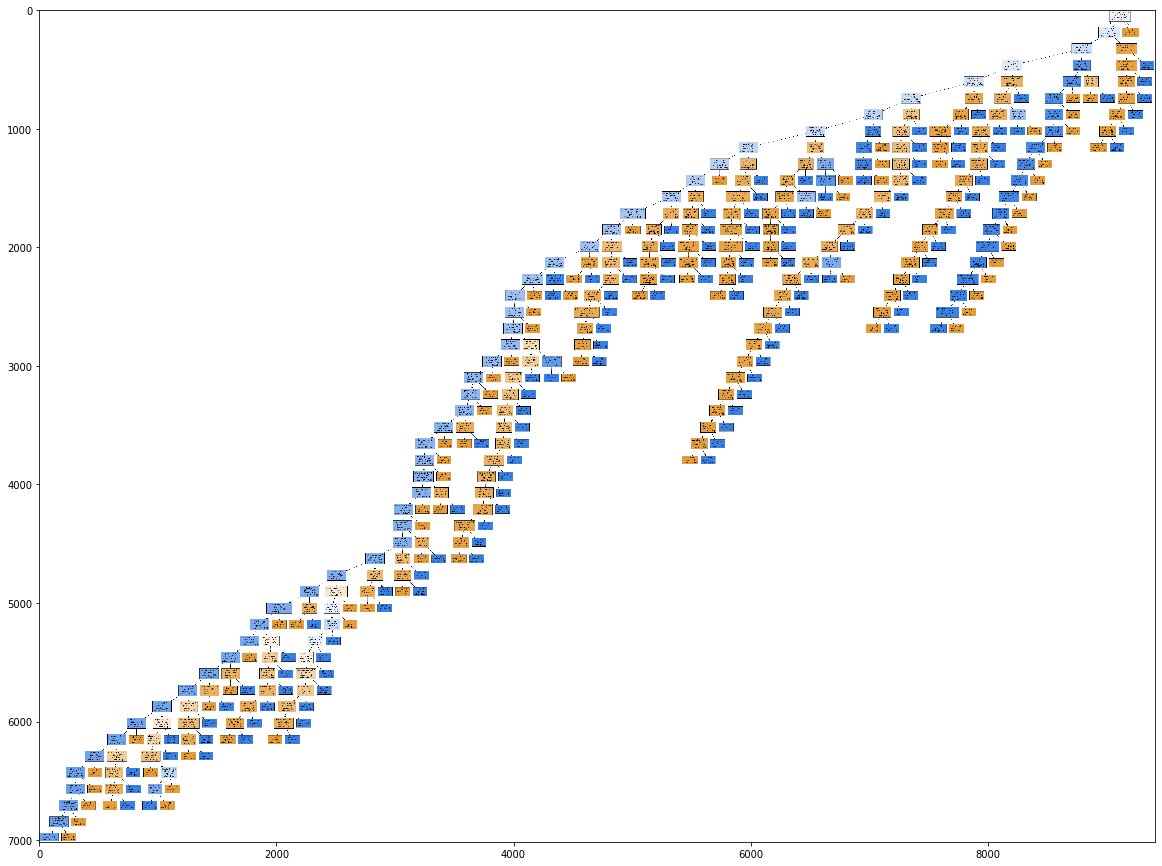

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import time
start_time = time.time()




def load_data(paths):
    vec = CountVectorizer(input='content', stop_words = stop_wordz) # vectorize text
    # create 2 new lists
    lines = [] 
    counts = []
    for p in paths:
        with open(p) as f:
            file_lines = f.readlines()
            # append the size/length of file_lines to counts
        counts.append(len(file_lines))
        lines.extend([l.strip() for l in file_lines])
    vec.fit(lines)
    # create a data_matrix array of your vectorized data
    data_matrix = vec.transform(lines).toarray()
    # set classes to 0 and 1
    y = np.concatenate((np.zeros(counts[0]), np.ones(counts[1])))
    return split_data(data_matrix, y), vec.get_feature_names()


def split_data(X, y, train_size=0.7, val_size=0.15):
    total_data = X.shape[0]
    train_size = int(train_size * total_data)
    val_size = int(val_size * total_data)
    test_size = total_data - train_size - val_size

    train_test_X, val_X, train_test_y, val_y = train_test_split(X, y, test_size=val_size)
    train_X, test_X, train_y, test_y = train_test_split(train_test_X, train_test_y, test_size=test_size)

    return {
        'train': (train_X, train_y),
        'val':  (val_X, val_y),
        'test': (test_X, test_y)
    }


def select_model(depths, data, criterion):
    out = {}
    for d in depths:
        print('Evaluating on depth {}'.format(d))
        out[d] = {}
        tree = DecisionTreeClassifier(criterion=criterion, max_depth=d)
        tree.fit(data['train'][0], data['train'][1])
        out[d]['val'] = tree.score(*data['val'])
        out[d]['train'] = tree.score(*data['train'])
        out[d]['model'] = tree
    return out


def visualize_tree(model, feature_names, criterion):
    from sklearn.tree import export_graphviz
    from sklearn import tree
    import graphviz
    export_graphviz(model, 'tree.dot', feature_names = feature_names, filled=True)
    #dot_data = tree.export_graphviz(model, feature_names=feature_names)
    ! dot -Tpng tree.dot -o tree.png
    import matplotlib.pyplot as plt
    import cv2
    %matplotlib inline
    img = cv2.imread('tree.png')
    plt.figure(figsize = (20, 20))
    plt.imshow(img)




def main():
    data, feature_names = load_data(['sci_titles_scraped_dropdu', 'pseudo_titles_scraped'])
    print(feature_names[200:250])

    for criterion in ("entropy", "gini"):
        print("\nUsing criterion {}".format(criterion))
        res = select_model([1,5,10,15,20,25,30,50,100], data, criterion)
        best_d = None
        best_acc = 0
        for d in res:
            val_acc = res[d]['val']
            print("Depth: {}   Train: {}    Val: {}".format(d, res[d]['train'], val_acc))
            if val_acc  > best_acc:
                best_d = d
                best_acc = val_acc
        print("Best depth: {}    Test: {}".format(best_d, res[best_d]['model'].score(*data['test'])))
        visualize_tree(res[best_d]['model'], feature_names, criterion,)
        
        
        hooglin = res[best_d]['model'].predict(data['test'][0])
        print(confusion_matrix(data['test'][1], hooglin))
        print(classification_report(data['test'][1], hooglin))
        
        med = "Risk of pregnancy-related venous thromboembolism and obstetrical complications in women with inherited type I antithrombin deficiency: a retrospective, single-centre, cohort study"
        med2 = "Safety and immunogenicity of a tetravalent dengue vaccine in children aged 2–17 years: a randomised, placebo-controlled, phase 2 trial"
        med3 = "Adaptive Randomization of Veliparib–Carboplatin Treatment in Breast Cancer"
        med4 = "PD-1 Blockade with Pembrolizumab in Advanced Merkel-Cell Carcinoma"
        med5 = "Serious Asthma Events with Fluticasone plus Salmeterol versus Fluticasone Alone"
        altm = "Prevalence, Patterns, and Predictors of T'ai Chi and Qigong Use in the United States: Results of a Nationally Representative Survey"
        altm2 = 'Is Oral Chinese Herbal Medicine Beneficial for Psoriasis Vulgaris? A Meta-Analysis of Comparisons with Acitretin'
        altm3 = "The American Coneflower: A Prophylactic Role Involving Nonspecific Immunity"
        altm4 = "Effect of BEMER Magnetic Field Therapy on the Level of Fatigue in Patients with Multiple Sclerosis: A Randomized, Double-Blind Controlled Trial"
        altm5 = "Improving Access to Integrative Oncology Through Group Medical Visits: A Pilot Implementation Project"

        with open('sci_titles_scraped_dropdu', 'r') as f:
            realtitles = [line.strip() for line in f]
        # create an array of ones the same length as the title list
        k = np.ones(len(realtitles), dtype = int)
        # create a dataframe of titles in one column and corresponding class in the next
        titles_real = pd.DataFrame({'Titles': realtitles, "Class":k })
        with open('pseudo_titles_scraped', 'r') as f:
            pseudotitles = [line.strip() for line in f]
        l = np.zeros(len(pseudotitles), dtype = int)
        titles_fake = pd.DataFrame({"Titles": pseudotitles, 'Class': l})
            # concatenate 
        titles_all = pd.concat([titles_real, titles_fake], ignore_index=True)
        
        word_bagger = CountVectorizer(stop_words=stop_wordz)
        word_bagger.fit(titles_all['Titles'])
        #word_bagger.fit([medab, medab2, medab3, medab4, medab5, altmab, altmab2, altmab3, altmab4, altmab5])
        
        
        bagged = word_bagger.transform([med, med2, med3, med4, med5, altm, altm2, altm3, altm4, altm5]).toarray()
        
        print("Predictions of 5 medical and 5 alternative medical titles, respectively are {}".format(res[best_d]['model'].predict(bagged)))


        


if __name__ == '__main__':
    main()
print("--- %s seconds ---" % (time.time() - start_time))

# Fit to Abstracts

['072', '073', '074', '0747', '075', '077', '078', '079', '08', '080', '081', '082', '084', '0842nrf', '085', '086', '09', '093', '094', '0941', '095', '097', '0978', '098', '099', '0_5', '0r4534', '0t', '10', '100', '1000', '10000', '1000ch', '1003', '10045', '1007', '100mf', '101', '1010', '101056', '1012', '1014', '1015del', '102', '102000', '1025', '1026', '1027', '1029', '103']

Using criterion entropy
Evaluating on depth 1
Evaluating on depth 5
Evaluating on depth 10
Evaluating on depth 15
Evaluating on depth 20
Evaluating on depth 25
Evaluating on depth 30
Evaluating on depth 50
Evaluating on depth 100
Depth: 1   Train: 0.6611675126903553    Val: 0.691699604743083
Depth: 5   Train: 0.8591370558375635    Val: 0.841897233201581
Depth: 10   Train: 0.9141285956006768    Val: 0.8715415019762845
Depth: 15   Train: 0.9352791878172588    Val: 0.8754940711462451
Depth: 20   Train: 0.9450084602368867    Val: 0.8735177865612648
Depth: 25   Train: 0.9619289340101523    Val: 0.86758893280632

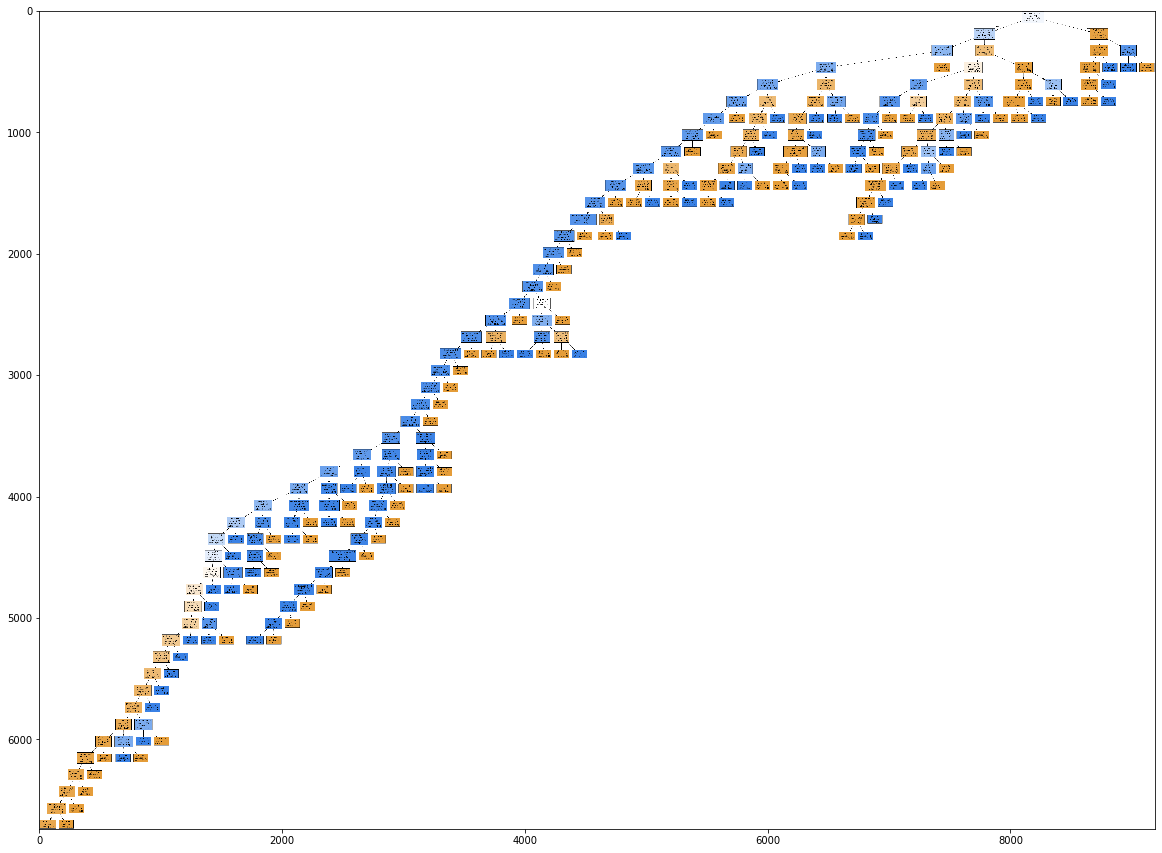

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import time
start_time = time.time()



def load_data(paths):
    vec = CountVectorizer(input='content', stop_words = stop_wordz) # vectorize text
    # create 2 new lists
    lines = [] 
    counts = []
    for p in paths:
        with open(p) as f:
            file_lines = f.readlines()
            # append the size/length of file_lines to counts
        counts.append(len(file_lines))
        lines.extend([l.strip() for l in file_lines])
    vec.fit(lines)
    # create a data_matrix array of your vectorized data
    data_matrix = vec.transform(lines).toarray()
    # set classes to 0 and 1
    y = np.concatenate((np.zeros(counts[0]), np.ones(counts[1])))
    return split_data(data_matrix, y), vec.get_feature_names()


def split_data(X, y, train_size=0.7, val_size=0.15):
    total_data = X.shape[0]
    train_size = int(train_size * total_data)
    val_size = int(val_size * total_data)
    test_size = total_data - train_size - val_size

    train_test_X, val_X, train_test_y, val_y = train_test_split(X, y, test_size=val_size)
    train_X, test_X, train_y, test_y = train_test_split(train_test_X, train_test_y, test_size=test_size)

    return {
        'train': (train_X, train_y),
        'val':  (val_X, val_y),
        'test': (test_X, test_y)
    }


def select_model(depths, data, criterion):
    out = {}
    for d in depths:
        print('Evaluating on depth {}'.format(d))
        out[d] = {}
        tree = DecisionTreeClassifier(criterion=criterion, max_depth=d)
        tree.fit(data['train'][0], data['train'][1])
        out[d]['val'] = tree.score(*data['val'])
        out[d]['train'] = tree.score(*data['train'])
        out[d]['model'] = tree
    return out


def visualize_tree(model, feature_names, criterion):
    from sklearn.tree import export_graphviz
    from sklearn import tree
    import graphviz
    export_graphviz(model, 'tree.dot', feature_names = feature_names, filled=True)
    #dot_data = tree.export_graphviz(model, feature_names=feature_names)
    ! dot -Tpng tree.dot -o tree.png
    import matplotlib.pyplot as plt
    import cv2
    %matplotlib inline
    img = cv2.imread('tree.png')
    plt.figure(figsize = (20, 20))
    plt.imshow(img)




def main():
    data, feature_names = load_data(['sci_abstracts_scraped_dropdu', 'pseudo_abstracts_scraped'])
    print(feature_names[200:250])

    for criterion in ("entropy", "gini"):
        print("\nUsing criterion {}".format(criterion))
        res = select_model([1,5,10,15,20,25,30,50,100], data, criterion)
        best_d = None
        best_acc = 0
        for d in res:
            val_acc = res[d]['val']
            print("Depth: {}   Train: {}    Val: {}".format(d, res[d]['train'], val_acc))
            if val_acc  > best_acc:
                best_d = d
                best_acc = val_acc
        print("Best depth: {}    Test: {}".format(best_d, res[best_d]['model'].score(*data['test'])))
        visualize_tree(res[best_d]['model'], feature_names, criterion,)
        hooglin = res[best_d]['model'].predict(data['test'][0])
        print(confusion_matrix(data['test'][1], hooglin))
        print(classification_report(data['test'][1], hooglin))
        
        
        medab = "The National Institute of Mental Health (NIMH) ‘fast-fail’ approach seeks to improve too-often-misleading early-phase drug development methods by incorporating biomarker-based proof-of-mechanism (POM) testing in phase 2a. This first comprehensive application of the fast-fail approach evaluated the potential of κ-opioid receptor (KOR) antagonism for treating anhedonia with a POM study determining whether robust target engagement favorably impacts the brain circuitry hypothesized to mediate clinical effects. Here we report the results from a multicenter, 8-week, double-blind, placebo-controlled, randomized trial in patients with anhedonia and a mood or anxiety disorder (selective KOR antagonist (JNJ-67953964, 10 mg; n = 45) and placebo (n = 44)). JNJ-67953964 significantly increased functional magnetic resonance imaging (fMRI) ventral striatum activation during reward anticipation (primary outcome) as compared to placebo (baseline-adjusted mean: JNJ-67953964, 0.72 (s.d. = 0.67); placebo, 0.33 (s.d. = 0.68); F(1,86) = 5.58, P < 0.01; effect size = 0.58 (95% confidence interval, 0.13–0.99)). JNJ-67953964, generally well tolerated, was not associated with any serious adverse events. This study supports proceeding with assessment of the clinical impact of target engagement and serves as a model for implementing the ‘fast-fail’ approach."
        medab2 = "Neoadjuvant checkpoint inhibition, in which the therapy is administered before surgery, is a promising new approach to managing bulky but resectable melanoma, and is also being explored in other cancers. This strategy has a high pathologic response rate, which correlates with survival outcomes. The fact that biopsies are routinely available provides a unique opportunity for understanding the responses to therapy and carrying out reverse translation in which these data are used to select therapies in the clinic or in trials that are more likely to improve patient outcomes. In this Perspective, we discuss the rationale for neoadjuvant immunotherapy in resectable solid tumors based on preclinical and human translational data, summarize the results of recent clinical trials and ongoing research, and focus on future directions for enhancing reverse translation."
        medab3 = "Successful drug discovery is ultimately contingent on the availability of workable, relevant, predictive model systems. Conversely, for cardiac muscle, the lack of human preclinical models to inform target validation and compound development has likely contributed to the perennial problem of clinical trial failures, despite encouraging non-human results. By contrast, human cardiomyocytes produced from pluripotent stem cell models have recently been applied to safety pharmacology, phenotypic screening, target validation and high-throughput assays, facilitating cardiac drug discovery. Here, we review the impact of human pluripotent stem cell models in cardiac drug discovery, discussing the range of applications, readouts, and disease models employed, along with the challenges and prospects to advance this fruitful mode of research further."
        medab4 = "Epithelial-to-mesenchymal transition (EMT) plays an important role in invasion and metastasis of hepatocellular carcinoma (HCC). Our previous study found that atypical protein kinase C-ι (aPKC-ι) promoted the EMT process in HCC. However, how the aPKC-ι signaling pathway is regulated in HCC has not been elucidated. In this study, vector transfection was utilized to study the invasion of HCC cells, and the mechanism between P300 and aPKC-ι signaling pathways in regulating the EMT process of HCC was further elucidated in vitro and in vivo. We found both P300 and aPKC-ι were highly expressed in HCC and they were correlated with tumor progression and poor survival in HCC patients. P300 knockdown inhibited EMT, invasion and other malignant events of HCC cells but promoted cell apoptosis and cycle arrest. However, the effects mediated by P300 knockdown were abolished by aPKC-ι overexpression. Further studies showed that P300 upregulates aPKC-ι expression through increasing the transcription of Elk1, a transcriptional activator of aPKC-ι, and stabilizing Elk1 protein and its phosphorylation. In conclusion, our work uncovered the molecular mechanism by which oncogenic aPKC-ι is upregulated in HCC and suggests that P300, like aPKC-ι, may be used as a prognostic biomarker and therapeutic target in patients with HCC."
        medab5 = "An unmet clinical need remains for an effective tetravalent dengue vaccine suitable for all age groups, regardless of serostatus. We assessed the immunogenicity and safety of three different dose schedules of a tetravalent dengue vaccine (TAK-003) over a 48-month period in children living in dengue-endemic countries. We did a large, phase 2, double-blind, placebo-controlled trial at three sites in the Dominican Republic, Panama, and the Philippines. Healthy participants aged 2–17 years were randomly assigned 1:2:5:1 using an interactive web response system with stratification by age to receive either a two-dose primary series (days 1 and 91), one primary dose (day 1), one primary dose plus booster (days 1 and 365), or placebo. Participants and relevant study personnel were masked to the random assignment until completion of the study at month 48. To maintain masking, TAK-003 recipients were administered placebo doses when appropriate. The primary objective was assessment of neutralising geometric mean titres for each serotype to month 48 assessed in the per-protocol immunogenicity subset. Secondary safety endpoints included proportions of participants with serious adverse events and symptomatic virologically confirmed dengue. This study is registered with ClinicalTrials.gov, NCT02302066. Between Dec 5, 2014, and Feb 13, 2015, 1800 children were randomly assigned to the following groups: two-dose primary series (n=201), one primary dose (n=398), one primary dose plus 1-year booster (n=1002), and placebo (n=199). Of them, 1479 (82%) participants completed the 48-month study. Immunogenicity endpoints were assessed in 562 participants enrolled in the immunogenicity subset, of whom 509 were included in the per-protocol subset. At month 48, antibody titres remained elevated in all TAK-003 groups compared with placebo, irrespective of baseline serostatus. At month 48, geometric mean titres were 378 (95% CI 226–632) in two-dose, 421 (285–622) in one-dose, 719 (538–960) in one-dose plus 1-year booster, and 100 (50–201) in placebo recipients against DENV 1; 1052 (732–1511), 1319 (970–1794), 1200 (927–1553), and 208 (99–437) against DENV 2; 183 (113–298), 201 (135–298), 288 (211–392), and 71 (37–139) against DENV 3; and 152 (97–239), 164 (114–236), 219 (165–290), and 46 (26–82) against DENV 4; and tetravalent seropositivity rate was 89% (79–96), 86% (80–92), 97% (93–99), and 60% (47–72), respectively. Virologically confirmed dengue was recorded in 37 (2%) TAK-003 and 13 (7%) placebo participants, with a relative risk of 0·35 (0·19–0·65). No vaccine-related serious adverse events or severe dengue virus disease were reported. TAK-003 elicited antibody responses against all four serotypes, which persisted to 48 months post-vaccination, regardless of baseline serostatus. No important safety risks were identified. We observed a long-term reduction in risk of symptomatic dengue virus disease in vaccinees. Results from this study provide a long-term safety database and support assessment of the vaccine in the ongoing phase 3 efficacy study."
        altmab = "In order to meet the growing needs of the European Union medicinal and aromatic plants, Hungary is still one of the major exporters today, although earlier, until the 1980s, we were considered a great herb-growing nation. Therefore, the development of the national medicinal and aromatic herb growing sector is an essential requirement for maintaining and developing our market position. The natural conditions of Hungary favor the cultivation of medicinal and aromatic plants. There are more than 330 herbs in our country. About seventy percent of the drugs grown and harvested are exported. However, significant changes are needed in domestic sales and further processing in order to become a leading industrial sector. Hungary also possesses modern separation techniques and large instruments for analysis, which allow the proper analytical examination of drugs and the precise determination of their active substances. Our universities and research institutes are also prepared to study the active ingredients of herbs by molecular biological methods, which may allow the exact mechanism of action of bioactive substances to be determined and the herbs to be reassessed. Our accession to the European Union the palette of products made from former herbs has significantly changed. From 2013, the category of medicinal product was discontinued and the preparations were classified as either food or medicine. However, there are significant costs associated with qualifying as a drug, so drugs or extracts are largely added to dietary supplements. As a result, the strange situation is that dietary supplements are prohibited from making any health claims, even though the dietary supplement is actually not for the benefit of a healthy population, but for those who have a health problem or do not have suitable foods, which are rich in bioactive substances. The justification of phytotherapy must be demonstrated, depending on the state of the art. In the context of safe therapy, studies must follow the requirements of medicines and only then can they become herbal medicines. There is still much to be desired in this area in our country. Classification as a drug is based on expensive animal tests and clinical studies. A new problem arises here, as herbal cure is currently part of the arsenal of complementary medicine. With few exceptions, clinical doctors do not use herbal therapies. Patients usually ask the advice of pharmacists, naturalists, and more rarely, dietitians. At the Arteriosclerosis Research Group, at the II. Department of Medicine and Institute of Pharmacognosy several decades of biomedical research have served and serve the purpose of evaluating and reassessing the effects of plants used in folk medicine. Over the years, we have been searching for drugs, extracts, and medicines of natural origin that are useful in liver and intestinal diseases known in folk medicine, and are believed to have lipid lowering, antioxidant and immune stimulating effects. In the article, animal and human studies will be also presented."
        altmab2 = "This research was done to explore the role of fresh garlic homogenate (GH) on attenuation of myocardial damage when administered concurrently with atenolol (ATN) in experimental animals. At the end of treatment of male albino rats, hearts were excised from anesthetized animals and mounted on modified Langendorff setup. After initial perfusion with physiological solution, hearts were subjected to 15 min global no flow ischemia reperfusion injury (IRI) and perfused again. Significant recovery in developed tension and heart rate was exhibited by hearts of animals pretreated with ATN, GH-125 and GH-250. There was significant elevation of LDH and CK-MB in heart tissue homogenate and fall in perfusate of treated groups (ATN, GH-125 and GH-250). Additionally, simultaneous administration of GH-250 with ATN resulted in significant increase in endogenous antioxidant enzymes (SOD and catalase) activities. The augmented antioxidant activities could be due to the possible synergistic potential of ATN in GH mediated scavenging of oxidative free radicals produced during IRI. On the contrary, high dose of GH (500 mg/kg) failed to demonstrate similar potential even in presence of ATN. Hence, only moderate intake of garlic is good for cardioprotection when administered prophylactically and addition of ATN produces synergistic effect."
        altmab3 = "NMR proton relaxation is sensitive to the dynamics of the water molecule H2O, through the interaction of the spin of the proton (1H) with external magnetic and electromagnetic fields. We measured dilution and potentization processes through measurements of 1H spin-lattice T1 and spin–spin T2 relaxation times. In order to interpret the recorded fluctuations in T1- or T2-values, experimental data were linearized by investigating how the area under a fluctuating time = f(dilution) curve (dilution integral or DI) changes with dilution. Two kinds of fitting procedures were considered: chi-square fitting with a goodness-of-fit probability, and least absolute deviations criterion with Pearson's linear correlation coefficient. We showed that fluctuations are not attributable to random noise and/or experimental errors, evidencing a memory effect quantifiable by the slope of the DI = f(dilution) straight line. For all experiments, correlation coefficients were found to lie above 0.9999, against 0.999 for random noise. The discrimination between experimental slopes and slopes associated with random noise data was very good at a five-sigma level of confidence (i.e. probability 3 × 10−7). Discrimination between experimental slopes at a five-sigma level was possible in most cases, with three exceptions: gelsemium aqua pura v gelsemium dilution (four-sigma); copper aqua pura v gelsemium aqua pura (four-sigma) and copper simple dilution v gelsemium simple dilution (three-sigma). All potentized samples show very good discrimination (at least nine-sigma level) against aqua pura, lactose or simple dilution. It was possible to transform the associated relaxation times into a molecular rotational correlation time τc and an average spin–spin distance d. Our experiments thus point to a considerable slowing down of molecular movements (τc > 1300 ps or T = 224–225 K) around water molecules up to a distance of 3.7 Å, values. It was also possible to rule out other possible mechanisms of relaxation (diffusive motion, 17O-1H relaxation or coupling with the electronic spin, S = 1, of dissolved dioxygen molecules). There is clear evidence that homeopathic solutions cannot be considered as pure water as commonly assumed. Instead, we have evidenced a clear memory effect upon dilution/potentization of a substance (water, lactose, copper, gelsemium) reflected by different rotational correlation times and average H⋯H distances. A possible explanation for such a memory effect may lie in the formation of mesoscopic water structures around nanoparticles and/or nanobubbles mediated by zero-point fluctuations of the vacuum electromagnetic field as suggested by quantum field theories. The existence of an Avogadro's ‘wall’ for homeopathically-prepared medicines is not supported by our data. Rather it appears that all dilutions have a specific material configuration determined by the potentized substance, also by the chemical nature of the containers, and dissolved gases and the electromagnetic environment. This sensitivity of homeopathically-prepared medicines to electromagnetic fields may be amplified by the highly non-linear processing routinely applied in the preparation of homeopathic medicines. Future work is needed in such directions. The time is now ripe for a demystification of the preparation of homeopathic remedies."
        altmab4 = "This article describes the implementation of a group medical visit (GMV) model to increase access to integrative oncology (IO) care. The most challenging and critical time to access high-quality IO care is while patients are receiving conventional cancer therapy. Often demand for individual IO clinic consultations precludes this from occurring. A three-session GMV program was designed to alleviate barriers to receiving integrative care during active cancer treatment. Design: A consolidated framework was used for implementation research and focused ethnography methods to describe the IO GMV implementation process. Data sources included patient evaluations, participant observation, and brief provider and patient interviews. Setting: A pilot program was created to assess the feasibility and acceptability of implementing IO GMVs at a comprehensive cancer center. Intervention: Each three-session GMV consisted of a didactic session, followed by individual visits with the integrative oncologist. Results: The setting, intervention, and implementation process of the IO GMV program were described. Thirty-two patients participated in the first five cohorts of the program. Twenty-two were women; 24 were White. The median age of participants was 52. Patient evaluations demonstrate high levels of satisfaction with the program with all scored aspects rated >4.0 on a five-point Likert scale. For the medical center, group visits are a financially viable alternative to individual IO visits; revenue from group visits exceeded the revenue potential of 6 h of individual visits by an average of 38%. Conclusion: GMVs are a feasible and promising model for increasing access to IO. Patients in active cancer treatment were able to participate in the program. Future research and implementation efforts could examine health outcomes over time after participation in GMVs, as well as the feasibility of using this model with more diverse patient populations." 
        altmab5 = "As rates of opiate misuse rise in the United States, so do significant associated health and financial consequences to afflicted individuals, their families, and society at large. Methadone maintenance therapy (MMT) is one evidence-based approach to treating opiate addiction, yet supplemental psychosocial treatment to support this approach is lacking. Mindfulness-based relapse prevention (MBRP) has shown to be efficacious in various substance use populations, but has yet to be assessed with MMT clients. Design: The current mixed methods study was designed to inform protocol adaptation for MMT clients and to evaluate the feasibility, acceptability, and preliminary efficacy of MBRP for this population. Subjects: The sample consisted of adults (N = 15) recruited from a methadone clinic to participate in a 6-week MBRP course. Outcome measures: Data from focus groups and course satisfaction surveys supported feasibility and acceptability of the intervention. Self-report outcome measures included depression, anxiety, craving, symptoms of post-traumatic stress, and experiential avoidance, and were assessed at baseline and postcourse. Results: Mean scores on all primary outcomes changed in the expected direction at postcourse, and baseline to postcourse changes in depression, craving, and trauma symptoms reached statistical significance. Conclusions: Results from this initial pilot trial support feasibility and acceptability, and provide preliminary data on outcomes for future trials of mindfulness-based approaches within the MMT community."

        with open('sci_abstracts_scraped_dropdu', 'r') as f:
            realabstracts = [line.strip() for line in f]
        # create an array of ones the same length as the title list
        k = np.ones(len(realabstracts), dtype = int)
        # create a dataframe of abstracts in one column and corresponding class in the next
        abstracts_real = pd.DataFrame({'Abstracts': realabstracts, "Class":k })
        with open('pseudo_abstracts_scraped', 'r') as f:
            pseudoabstracts = [line.strip() for line in f]
        l = np.zeros(len(pseudoabstracts), dtype = int)
        abstracts_fake = pd.DataFrame({"Abstracts": pseudoabstracts, 'Class': l})
        # concatenate 
        abstracts_all = pd.concat([abstracts_real, abstracts_fake])
        
        
        word_bagger = CountVectorizer(stop_words=stop_wordz)
        word_bagger.fit(abstracts_all['Abstracts'])
        
        abs_words = word_bagger.transform([medab, medab2, medab3, medab4, medab5, altmab, altmab2, altmab3, altmab4, altmab5]).toarray()
    
        #res[best_d]['model'].predict(abs_words)
    
    
    
        print("Predictions of 5 medical and 5 alternative medical abstracts, respectively are {}".format(res[best_d]['model'].predict(abs_words)))
        
        
    #pass


if __name__ == '__main__':
    main()
print("--- %s seconds ---" % (time.time() - start_time))

# Fit Data to Random Forest Classifier

Should lead to decreased variance and increased accuracy.

# Fit to Titles 

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

import time
start_time = time.time()



def load_data(paths):
    vec = CountVectorizer(input='content', stop_words = stop_wordz) # vectorize text
    # create 2 new lists
    lines = [] 
    counts = []
    for p in paths:
        with open(p) as f:
            file_lines = f.readlines()
            # append the size/lenghth of file_lines to counts
        counts.append(len(file_lines))
        lines.extend([l.strip() for l in file_lines])
    vec.fit(lines)
    # create a data_matrix array of your vectorized data
    data_matrix = vec.transform(lines).toarray()
    # set classes to 0 and 1
    y = np.concatenate((np.zeros(counts[0]), np.ones(counts[1])))
    return split_data(data_matrix, y), vec.get_feature_names()


def split_data(X, y, train_size=0.7, val_size=0.15):
    total_data = X.shape[0]
    train_size = int(train_size * total_data)
    val_size = int(val_size * total_data)
    test_size = total_data - train_size - val_size

    train_test_X, val_X, train_test_y, val_y = train_test_split(X, y, test_size=val_size)
    train_X, test_X, train_y, test_y = train_test_split(train_test_X, train_test_y, test_size=test_size)

    return {
        'train': (train_X, train_y),
        'val':  (val_X, val_y),
        'test': (test_X, test_y)
    }


def select_model(estimators, data, criterion):
    out = {}
    for d in estimators:
        print('Evaluating on estimator {}'.format(d))
        out[d] = {}
        tree = RandomForestClassifier(criterion=criterion, n_estimators=d)
        tree.fit(data['train'][0], data['train'][1])
        out[d]['val'] = tree.score(*data['val'])
        out[d]['train'] = tree.score(*data['train'])
        out[d]['model'] = tree
    return out


def visualize_tree(model, feature_names, criterion):
    

   
    # from sklearn.ensemble import RandomForestClassifier
    # model = RandomForestClassifier(n_estimators=10)

    # Train
    # model.fit(X,y)
    # Extract single tree
    # estimator = model.estimators_[5]

    from sklearn.tree import export_graphviz
    # Export as dot file
    export_graphviz(model, 'tree.dot', feature_names = feature_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

    # Convert to png using system command (requires Graphviz)
    from subprocess import call
    #call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
    ! dot -Tpng tree.dot -o tree.png -Gdpi=600
    # Display in jupyter notebook
    from IPython.display import Image
    Image(filename = 'tree.png')


def main():
    data, feature_names = load_data(['sci_titles_scraped_dropdu', 'pseudo_titles_scraped'])
    print(feature_names[200:250])

    for criterion in ("entropy", "gini"):
        print("\nUsing criterion {}".format(criterion))
        res = select_model([1,5,10,15,20,25,30,50,100], data, criterion)
        best_d = None
        best_acc = 0
        for d in res:
            val_acc = res[d]['val']
            print("n_Estimators: {}   Train: {}    Val: {}".format(d, res[d]['train'], val_acc))
            if val_acc  > best_acc:
                best_d = d
                best_acc = val_acc
        print("Best n_Estimators: {}    Test: {}".format(best_d, res[best_d]['model'].score(*data['test'])))
        #visualize_tree(res[best_d]['model'], feature_names, criterion,)
        hooglin = res[best_d]['model'].predict(data['test'][0])
        print(confusion_matrix(data['test'][1], hooglin))
        print(classification_report(data['test'][1], hooglin))
        
        with open('sci_titles_scraped_dropdu', 'r') as f:
            realtitles = [line.strip() for line in f]
        # create an array of ones the same length as the title list
        k = np.ones(len(realtitles), dtype = int)
        # create a dataframe of titles in one column and corresponding class in the next
        titles_real = pd.DataFrame({'Titles': realtitles, "Class":k })
        with open('pseudo_titles_scraped', 'r') as f:
            pseudotitles = [line.strip() for line in f]
        l = np.zeros(len(pseudotitles), dtype = int)
        titles_fake = pd.DataFrame({"Titles": pseudotitles, 'Class': l})
            # concatenate 
        titles_all = pd.concat([titles_real, titles_fake])
        
        word_bagger = CountVectorizer(stop_words=stop_wordz)
        word_bagger.fit(titles_all['Titles'])
        #word_bagger.fit([medab, medab2, medab3, medab4, medab5, altmab, altmab2, altmab3, altmab4, altmab5])
        
        
        bagged = word_bagger.transform([med, med2, med3, med4, med5, altm, altm2, altm3, altm4, altm5]).toarray()
        
        print("Predictions of 5 medical and 5 alternative medical title, respectively are {}".format(res[best_d]['model'].predict(bagged)))


        
    #pass


if __name__ == '__main__':
    main()
print("--- %s seconds ---" % (time.time() - start_time))

['abhyanga', 'abilities', 'ability', 'abiotically', 'abiraterone', 'ablation', 'able', 'abnormal', 'abnormalities', 'abortion', 'abrogates', 'absence', 'absorption', 'abstinence', 'abundances', 'abundant', 'abuse', 'academic', 'acadl', 'accelerated', 'accelerates', 'accelerating', 'accelerometer', 'acceptability', 'acceptance', 'accepted', 'access', 'accessibility', 'accessory', 'accident', 'acclimatisation', 'accompanied', 'accomplish', 'accomplishing', 'according', 'account', 'acculturation', 'accumulation', 'accuracy', 'accurate', 'ace2', 'acetaminophen', 'acetate', 'acetone', 'acetylator', 'acetylcholine', 'acetylcholinesterase', 'achieve', 'achieved', 'acid']

Using criterion entropy
Evaluating on estimator 1
Evaluating on estimator 5
Evaluating on estimator 10
Evaluating on estimator 15
Evaluating on estimator 20
Evaluating on estimator 25
Evaluating on estimator 30
Evaluating on estimator 50
Evaluating on estimator 100
n_Estimators: 1   Train: 0.9144067796610169    Val: 0.746534

# Fit to Abstracts

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

import time
start_time = time.time()



def load_data(paths):
    vec = CountVectorizer(input='content', stop_words=stop_wordz) # vectorize text
    # create 2 new lists
    lines = [] 
    counts = []
    for p in paths:
        with open(p) as f:
            file_lines = f.readlines()
            # append the size/lenghth of file_lines to counts
        counts.append(len(file_lines))
        lines.extend([l.strip() for l in file_lines])
    vec.fit(lines)
    # create a data_matrix array of your vectorized data
    data_matrix = vec.transform(lines).toarray()
    # set classes to 0 and 1
    y = np.concatenate((np.zeros(counts[0]), np.ones(counts[1])))
    return split_data(data_matrix, y), vec.get_feature_names()


def split_data(X, y, train_size=0.7, val_size=0.15):
    total_data = X.shape[0]
    train_size = int(train_size * total_data)
    val_size = int(val_size * total_data)
    test_size = total_data - train_size - val_size

    train_test_X, val_X, train_test_y, val_y = train_test_split(X, y, test_size=val_size)
    train_X, test_X, train_y, test_y = train_test_split(train_test_X, train_test_y, test_size=test_size)

    return {
        'train': (train_X, train_y),
        'val':  (val_X, val_y),
        'test': (test_X, test_y)
    }


def select_model(estimators, data, criterion):
    out = {}
    for d in estimators:
        print('Evaluating on estimator {}'.format(d))
        out[d] = {}
        tree = RandomForestClassifier(criterion=criterion, n_estimators=d)
        tree.fit(data['train'][0], data['train'][1])
        out[d]['val'] = tree.score(*data['val'])
        out[d]['train'] = tree.score(*data['train'])
        out[d]['model'] = tree
    return out


def visualize_tree(model, feature_names, criterion):
    



    from sklearn.tree import export_graphviz
    # Export as dot file
    export_graphviz(model, 'tree.dot', feature_names = feature_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

    # Convert to png using system command (requires Graphviz)
    from subprocess import call
    #call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
    ! dot -Tpng tree.dot -o tree.png -Gdpi=600
    # Display in jupyter notebook
    from IPython.display import Image
    Image(filename = 'tree.png')


def main():
    data, feature_names = load_data(['sci_abstracts_scraped_dropdu', 'pseudo_abstracts_scraped'])
    print(feature_names[200:250])

    for criterion in ("entropy", "gini"):
        print("\nUsing criterion {}".format(criterion))
        res = select_model([1,5,10,15,20,25,30,50,100,150], data, criterion)
        best_d = None
        best_acc = 0
        for d in res:
            val_acc = res[d]['val']
            print("n_Estimators: {}   Train: {}    Val: {}".format(d, res[d]['train'], val_acc))
            if val_acc  > best_acc:
                best_d = d
                best_acc = val_acc
        print("Best n_Estimators: {}    Test: {}".format(best_d, res[best_d]['model'].score(*data['test'])))
        hooglin = res[best_d]['model'].predict(data['test'][0])
        print(confusion_matrix(data['test'][1], hooglin))
        print(classification_report(data['test'][1], hooglin))
        
        medab = "The National Institute of Mental Health (NIMH) ‘fast-fail’ approach seeks to improve too-often-misleading early-phase drug development methods by incorporating biomarker-based proof-of-mechanism (POM) testing in phase 2a. This first comprehensive application of the fast-fail approach evaluated the potential of κ-opioid receptor (KOR) antagonism for treating anhedonia with a POM study determining whether robust target engagement favorably impacts the brain circuitry hypothesized to mediate clinical effects. Here we report the results from a multicenter, 8-week, double-blind, placebo-controlled, randomized trial in patients with anhedonia and a mood or anxiety disorder (selective KOR antagonist (JNJ-67953964, 10 mg; n = 45) and placebo (n = 44)). JNJ-67953964 significantly increased functional magnetic resonance imaging (fMRI) ventral striatum activation during reward anticipation (primary outcome) as compared to placebo (baseline-adjusted mean: JNJ-67953964, 0.72 (s.d. = 0.67); placebo, 0.33 (s.d. = 0.68); F(1,86) = 5.58, P < 0.01; effect size = 0.58 (95% confidence interval, 0.13–0.99)). JNJ-67953964, generally well tolerated, was not associated with any serious adverse events. This study supports proceeding with assessment of the clinical impact of target engagement and serves as a model for implementing the ‘fast-fail’ approach."
        medab2 = "Neoadjuvant checkpoint inhibition, in which the therapy is administered before surgery, is a promising new approach to managing bulky but resectable melanoma, and is also being explored in other cancers. This strategy has a high pathologic response rate, which correlates with survival outcomes. The fact that biopsies are routinely available provides a unique opportunity for understanding the responses to therapy and carrying out reverse translation in which these data are used to select therapies in the clinic or in trials that are more likely to improve patient outcomes. In this Perspective, we discuss the rationale for neoadjuvant immunotherapy in resectable solid tumors based on preclinical and human translational data, summarize the results of recent clinical trials and ongoing research, and focus on future directions for enhancing reverse translation."
        medab3 = "Successful drug discovery is ultimately contingent on the availability of workable, relevant, predictive model systems. Conversely, for cardiac muscle, the lack of human preclinical models to inform target validation and compound development has likely contributed to the perennial problem of clinical trial failures, despite encouraging non-human results. By contrast, human cardiomyocytes produced from pluripotent stem cell models have recently been applied to safety pharmacology, phenotypic screening, target validation and high-throughput assays, facilitating cardiac drug discovery. Here, we review the impact of human pluripotent stem cell models in cardiac drug discovery, discussing the range of applications, readouts, and disease models employed, along with the challenges and prospects to advance this fruitful mode of research further."
        medab4 = "Epithelial-to-mesenchymal transition (EMT) plays an important role in invasion and metastasis of hepatocellular carcinoma (HCC). Our previous study found that atypical protein kinase C-ι (aPKC-ι) promoted the EMT process in HCC. However, how the aPKC-ι signaling pathway is regulated in HCC has not been elucidated. In this study, vector transfection was utilized to study the invasion of HCC cells, and the mechanism between P300 and aPKC-ι signaling pathways in regulating the EMT process of HCC was further elucidated in vitro and in vivo. We found both P300 and aPKC-ι were highly expressed in HCC and they were correlated with tumor progression and poor survival in HCC patients. P300 knockdown inhibited EMT, invasion and other malignant events of HCC cells but promoted cell apoptosis and cycle arrest. However, the effects mediated by P300 knockdown were abolished by aPKC-ι overexpression. Further studies showed that P300 upregulates aPKC-ι expression through increasing the transcription of Elk1, a transcriptional activator of aPKC-ι, and stabilizing Elk1 protein and its phosphorylation. In conclusion, our work uncovered the molecular mechanism by which oncogenic aPKC-ι is upregulated in HCC and suggests that P300, like aPKC-ι, may be used as a prognostic biomarker and therapeutic target in patients with HCC."
        medab5 = "An unmet clinical need remains for an effective tetravalent dengue vaccine suitable for all age groups, regardless of serostatus. We assessed the immunogenicity and safety of three different dose schedules of a tetravalent dengue vaccine (TAK-003) over a 48-month period in children living in dengue-endemic countries. We did a large, phase 2, double-blind, placebo-controlled trial at three sites in the Dominican Republic, Panama, and the Philippines. Healthy participants aged 2–17 years were randomly assigned 1:2:5:1 using an interactive web response system with stratification by age to receive either a two-dose primary series (days 1 and 91), one primary dose (day 1), one primary dose plus booster (days 1 and 365), or placebo. Participants and relevant study personnel were masked to the random assignment until completion of the study at month 48. To maintain masking, TAK-003 recipients were administered placebo doses when appropriate. The primary objective was assessment of neutralising geometric mean titres for each serotype to month 48 assessed in the per-protocol immunogenicity subset. Secondary safety endpoints included proportions of participants with serious adverse events and symptomatic virologically confirmed dengue. This study is registered with ClinicalTrials.gov, NCT02302066. Between Dec 5, 2014, and Feb 13, 2015, 1800 children were randomly assigned to the following groups: two-dose primary series (n=201), one primary dose (n=398), one primary dose plus 1-year booster (n=1002), and placebo (n=199). Of them, 1479 (82%) participants completed the 48-month study. Immunogenicity endpoints were assessed in 562 participants enrolled in the immunogenicity subset, of whom 509 were included in the per-protocol subset. At month 48, antibody titres remained elevated in all TAK-003 groups compared with placebo, irrespective of baseline serostatus. At month 48, geometric mean titres were 378 (95% CI 226–632) in two-dose, 421 (285–622) in one-dose, 719 (538–960) in one-dose plus 1-year booster, and 100 (50–201) in placebo recipients against DENV 1; 1052 (732–1511), 1319 (970–1794), 1200 (927–1553), and 208 (99–437) against DENV 2; 183 (113–298), 201 (135–298), 288 (211–392), and 71 (37–139) against DENV 3; and 152 (97–239), 164 (114–236), 219 (165–290), and 46 (26–82) against DENV 4; and tetravalent seropositivity rate was 89% (79–96), 86% (80–92), 97% (93–99), and 60% (47–72), respectively. Virologically confirmed dengue was recorded in 37 (2%) TAK-003 and 13 (7%) placebo participants, with a relative risk of 0·35 (0·19–0·65). No vaccine-related serious adverse events or severe dengue virus disease were reported. TAK-003 elicited antibody responses against all four serotypes, which persisted to 48 months post-vaccination, regardless of baseline serostatus. No important safety risks were identified. We observed a long-term reduction in risk of symptomatic dengue virus disease in vaccinees. Results from this study provide a long-term safety database and support assessment of the vaccine in the ongoing phase 3 efficacy study."
        altmab = "In order to meet the growing needs of the European Union medicinal and aromatic plants, Hungary is still one of the major exporters today, although earlier, until the 1980s, we were considered a great herb-growing nation. Therefore, the development of the national medicinal and aromatic herb growing sector is an essential requirement for maintaining and developing our market position. The natural conditions of Hungary favor the cultivation of medicinal and aromatic plants. There are more than 330 herbs in our country. About seventy percent of the drugs grown and harvested are exported. However, significant changes are needed in domestic sales and further processing in order to become a leading industrial sector. Hungary also possesses modern separation techniques and large instruments for analysis, which allow the proper analytical examination of drugs and the precise determination of their active substances. Our universities and research institutes are also prepared to study the active ingredients of herbs by molecular biological methods, which may allow the exact mechanism of action of bioactive substances to be determined and the herbs to be reassessed. Our accession to the European Union the palette of products made from former herbs has significantly changed. From 2013, the category of medicinal product was discontinued and the preparations were classified as either food or medicine. However, there are significant costs associated with qualifying as a drug, so drugs or extracts are largely added to dietary supplements. As a result, the strange situation is that dietary supplements are prohibited from making any health claims, even though the dietary supplement is actually not for the benefit of a healthy population, but for those who have a health problem or do not have suitable foods, which are rich in bioactive substances. The justification of phytotherapy must be demonstrated, depending on the state of the art. In the context of safe therapy, studies must follow the requirements of medicines and only then can they become herbal medicines. There is still much to be desired in this area in our country. Classification as a drug is based on expensive animal tests and clinical studies. A new problem arises here, as herbal cure is currently part of the arsenal of complementary medicine. With few exceptions, clinical doctors do not use herbal therapies. Patients usually ask the advice of pharmacists, naturalists, and more rarely, dietitians. At the Arteriosclerosis Research Group, at the II. Department of Medicine and Institute of Pharmacognosy several decades of biomedical research have served and serve the purpose of evaluating and reassessing the effects of plants used in folk medicine. Over the years, we have been searching for drugs, extracts, and medicines of natural origin that are useful in liver and intestinal diseases known in folk medicine, and are believed to have lipid lowering, antioxidant and immune stimulating effects. In the article, animal and human studies will be also presented."
        altmab2 = "This research was done to explore the role of fresh garlic homogenate (GH) on attenuation of myocardial damage when administered concurrently with atenolol (ATN) in experimental animals. At the end of treatment of male albino rats, hearts were excised from anesthetized animals and mounted on modified Langendorff setup. After initial perfusion with physiological solution, hearts were subjected to 15 min global no flow ischemia reperfusion injury (IRI) and perfused again. Significant recovery in developed tension and heart rate was exhibited by hearts of animals pretreated with ATN, GH-125 and GH-250. There was significant elevation of LDH and CK-MB in heart tissue homogenate and fall in perfusate of treated groups (ATN, GH-125 and GH-250). Additionally, simultaneous administration of GH-250 with ATN resulted in significant increase in endogenous antioxidant enzymes (SOD and catalase) activities. The augmented antioxidant activities could be due to the possible synergistic potential of ATN in GH mediated scavenging of oxidative free radicals produced during IRI. On the contrary, high dose of GH (500 mg/kg) failed to demonstrate similar potential even in presence of ATN. Hence, only moderate intake of garlic is good for cardioprotection when administered prophylactically and addition of ATN produces synergistic effect."
        altmab3 = "NMR proton relaxation is sensitive to the dynamics of the water molecule H2O, through the interaction of the spin of the proton (1H) with external magnetic and electromagnetic fields. We measured dilution and potentization processes through measurements of 1H spin-lattice T1 and spin–spin T2 relaxation times. In order to interpret the recorded fluctuations in T1- or T2-values, experimental data were linearized by investigating how the area under a fluctuating time = f(dilution) curve (dilution integral or DI) changes with dilution. Two kinds of fitting procedures were considered: chi-square fitting with a goodness-of-fit probability, and least absolute deviations criterion with Pearson's linear correlation coefficient. We showed that fluctuations are not attributable to random noise and/or experimental errors, evidencing a memory effect quantifiable by the slope of the DI = f(dilution) straight line. For all experiments, correlation coefficients were found to lie above 0.9999, against 0.999 for random noise. The discrimination between experimental slopes and slopes associated with random noise data was very good at a five-sigma level of confidence (i.e. probability 3 × 10−7). Discrimination between experimental slopes at a five-sigma level was possible in most cases, with three exceptions: gelsemium aqua pura v gelsemium dilution (four-sigma); copper aqua pura v gelsemium aqua pura (four-sigma) and copper simple dilution v gelsemium simple dilution (three-sigma). All potentized samples show very good discrimination (at least nine-sigma level) against aqua pura, lactose or simple dilution. It was possible to transform the associated relaxation times into a molecular rotational correlation time τc and an average spin–spin distance d. Our experiments thus point to a considerable slowing down of molecular movements (τc > 1300 ps or T = 224–225 K) around water molecules up to a distance of 3.7 Å, values. It was also possible to rule out other possible mechanisms of relaxation (diffusive motion, 17O-1H relaxation or coupling with the electronic spin, S = 1, of dissolved dioxygen molecules). There is clear evidence that homeopathic solutions cannot be considered as pure water as commonly assumed. Instead, we have evidenced a clear memory effect upon dilution/potentization of a substance (water, lactose, copper, gelsemium) reflected by different rotational correlation times and average H⋯H distances. A possible explanation for such a memory effect may lie in the formation of mesoscopic water structures around nanoparticles and/or nanobubbles mediated by zero-point fluctuations of the vacuum electromagnetic field as suggested by quantum field theories. The existence of an Avogadro's ‘wall’ for homeopathically-prepared medicines is not supported by our data. Rather it appears that all dilutions have a specific material configuration determined by the potentized substance, also by the chemical nature of the containers, and dissolved gases and the electromagnetic environment. This sensitivity of homeopathically-prepared medicines to electromagnetic fields may be amplified by the highly non-linear processing routinely applied in the preparation of homeopathic medicines. Future work is needed in such directions. The time is now ripe for a demystification of the preparation of homeopathic remedies."
        altmab4 = "This article describes the implementation of a group medical visit (GMV) model to increase access to integrative oncology (IO) care. The most challenging and critical time to access high-quality IO care is while patients are receiving conventional cancer therapy. Often demand for individual IO clinic consultations precludes this from occurring. A three-session GMV program was designed to alleviate barriers to receiving integrative care during active cancer treatment. Design: A consolidated framework was used for implementation research and focused ethnography methods to describe the IO GMV implementation process. Data sources included patient evaluations, participant observation, and brief provider and patient interviews. Setting: A pilot program was created to assess the feasibility and acceptability of implementing IO GMVs at a comprehensive cancer center. Intervention: Each three-session GMV consisted of a didactic session, followed by individual visits with the integrative oncologist. Results: The setting, intervention, and implementation process of the IO GMV program were described. Thirty-two patients participated in the first five cohorts of the program. Twenty-two were women; 24 were White. The median age of participants was 52. Patient evaluations demonstrate high levels of satisfaction with the program with all scored aspects rated >4.0 on a five-point Likert scale. For the medical center, group visits are a financially viable alternative to individual IO visits; revenue from group visits exceeded the revenue potential of 6 h of individual visits by an average of 38%. Conclusion: GMVs are a feasible and promising model for increasing access to IO. Patients in active cancer treatment were able to participate in the program. Future research and implementation efforts could examine health outcomes over time after participation in GMVs, as well as the feasibility of using this model with more diverse patient populations." 
        altmab5 = "As rates of opiate misuse rise in the United States, so do significant associated health and financial consequences to afflicted individuals, their families, and society at large. Methadone maintenance therapy (MMT) is one evidence-based approach to treating opiate addiction, yet supplemental psychosocial treatment to support this approach is lacking. Mindfulness-based relapse prevention (MBRP) has shown to be efficacious in various substance use populations, but has yet to be assessed with MMT clients. Design: The current mixed methods study was designed to inform protocol adaptation for MMT clients and to evaluate the feasibility, acceptability, and preliminary efficacy of MBRP for this population. Subjects: The sample consisted of adults (N = 15) recruited from a methadone clinic to participate in a 6-week MBRP course. Outcome measures: Data from focus groups and course satisfaction surveys supported feasibility and acceptability of the intervention. Self-report outcome measures included depression, anxiety, craving, symptoms of post-traumatic stress, and experiential avoidance, and were assessed at baseline and postcourse. Results: Mean scores on all primary outcomes changed in the expected direction at postcourse, and baseline to postcourse changes in depression, craving, and trauma symptoms reached statistical significance. Conclusions: Results from this initial pilot trial support feasibility and acceptability, and provide preliminary data on outcomes for future trials of mindfulness-based approaches within the MMT community."

        with open('sci_abstracts_scraped_dropdu', 'r') as f:
            realabstracts = [line.strip() for line in f]
        # create an array of ones the same length as the title list
        k = np.ones(len(realabstracts), dtype = int)
        # create a dataframe of abstracts in one column and corresponding class in the next
        abstracts_real = pd.DataFrame({'Abstracts': realabstracts, "Class":k })
        with open('pseudo_abstracts_scraped', 'r') as f:
            pseudoabstracts = [line.strip() for line in f]
        l = np.zeros(len(pseudoabstracts), dtype = int)
        abstracts_fake = pd.DataFrame({"Abstracts": pseudoabstracts, 'Class': l})
        # concatenate 
        abstracts_all = pd.concat([abstracts_real, abstracts_fake])
        
        
        word_bagger = CountVectorizer(stop_words=stop_wordz)
        word_bagger.fit(abstracts_all['Abstracts'])
        #word_bagger.fit([medab, medab2, medab3, medab4, medab5, altmab, altmab2, altmab3, altmab4, altmab5])
        
        abs_words = word_bagger.transform([medab, medab2, medab3, medab4, medab5, altmab, altmab2, altmab3, altmab4, altmab5]).toarray()
    
        #res[best_d]['model'].predict(abs_words)
    
    
    
        print("Predictions of 5 medical and 5 alternative medical abstracts, respectively are {}".format(res[best_d]['model'].predict(abs_words)))
        



if __name__ == '__main__':
    main()

print("--- %s seconds ---" % (time.time() - start_time))

['072', '073', '074', '0747', '075', '077', '078', '079', '08', '080', '081', '082', '084', '0842nrf', '085', '086', '09', '093', '094', '0941', '095', '097', '0978', '098', '099', '0_5', '0r4534', '0t', '10', '100', '1000', '10000', '1000ch', '1003', '10045', '1007', '100mf', '101', '1010', '101056', '1012', '1014', '1015del', '102', '102000', '1025', '1026', '1027', '1029', '103']

Using criterion entropy
Evaluating on estimator 1
Evaluating on estimator 5
Evaluating on estimator 10
Evaluating on estimator 15
Evaluating on estimator 20
Evaluating on estimator 25
Evaluating on estimator 30
Evaluating on estimator 50
Evaluating on estimator 100
Evaluating on estimator 150
n_Estimators: 1   Train: 0.9170896785109983    Val: 0.7964426877470355
n_Estimators: 5   Train: 0.9847715736040609    Val: 0.8952569169960475
n_Estimators: 10   Train: 0.9970389170896785    Val: 0.9189723320158103
n_Estimators: 15   Train: 0.9970389170896785    Val: 0.932806324110672
n_Estimators: 20   Train: 0.997461

# Fitting Data to Adaboost

Reduces bias and increases accuracy by iteratively focusing on previous misclassifications.



# Fit to Titles

In [98]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import time
start_time = time.time()


def load_data(paths):
    vec = CountVectorizer(input='content', stop_words=stop_wordz) # vectorize text
    # create 2 new lists
    lines = [] 
    counts = []
    for p in paths:
        with open(p) as f:
            file_lines = f.readlines()
            # append the size/lenghth of file_lines to counts
        counts.append(len(file_lines))
        lines.extend([l.strip() for l in file_lines])
    vec.fit(lines)
    # create a data_matrix array of your vectorized data
    data_matrix = vec.transform(lines).toarray()
    # set classes to 0 and 1
    y = np.concatenate((np.zeros(counts[0]), np.ones(counts[1])))
    return split_data(data_matrix, y), vec.get_feature_names()


def split_data(X, y, train_size=0.7, val_size=0.15):
    total_data = X.shape[0]
    train_size = int(train_size * total_data)
    val_size = int(val_size * total_data)
    test_size = total_data - train_size - val_size

    train_test_X, val_X, train_test_y, val_y = train_test_split(X, y, test_size=val_size)
    train_X, test_X, train_y, test_y = train_test_split(train_test_X, train_test_y, test_size=test_size)

    return {
        'train': (train_X, train_y),
        'val':  (val_X, val_y),
        'test': (test_X, test_y)
    }


def select_model(estimators, data):
    out = {}
    for d in estimators:
        print('Evaluating on estimator {}'.format(d))
        out[d] = {}
        tree = AdaBoostClassifier(n_estimators=d, random_state = 42)
        tree.fit(data['train'][0], data['train'][1])
        out[d]['val'] = tree.score(*data['val'])
        out[d]['train'] = tree.score(*data['train'])
        out[d]['model'] = tree
    return out


def main():
    data, feature_names = load_data(['sci_titles_scraped_dropdu', 'pseudo_titles_scraped'])
    print(feature_names[200:250])
    res = select_model([1,5,10,20,30,50,100,150], data)
    best_d = None
    best_acc = 0
    for d in res:
        val_acc = res[d]['val']
        print("n_Estimators: {}   Train: {}    Val: {}".format(d, res[d]['train'], val_acc))
        if val_acc  > best_acc:
            best_d = d
            best_acc = val_acc
    print("Best n_Estimators: {}    Test: {}".format(best_d, res[best_d]['model'].score(*data['test'])))
    #visualize_tree(res[best_d]['model'], feature_names)
    hooglin = res[best_d]['model'].predict(data['test'][0])
    print(confusion_matrix(data['test'][1], hooglin))
    print(classification_report(data['test'][1], hooglin))    
    
    with open('sci_titles_scraped_dropdu', 'r') as f:
        realtitles = [line.strip() for line in f]
        # create an array of ones the same length as the title list
    k = np.ones(len(realtitles), dtype = int)
        # create a dataframe of titles in one column and corresponding class in the next
    titles_real = pd.DataFrame({'Titles': realtitles, "Class":k })
    with open('pseudo_titles_scraped', 'r') as f:
        pseudotitles = [line.strip() for line in f]
    l = np.zeros(len(pseudotitles), dtype = int)
    titles_fake = pd.DataFrame({"Titles": pseudotitles, 'Class': l})
    # concatenate 
    titles_all = pd.concat([titles_real, titles_fake])
        
    word_bagger = CountVectorizer(stop_words=stop_wordz)
    word_bagger.fit(titles_all['Titles'])
    #word_bagger.fit([medab, medab2, medab3, medab4, medab5, altmab, altmab2, altmab3, altmab4, altmab5])
        
        
    bagged = word_bagger.transform([med, med2, med3, med4, med5, altm, altm2, altm3, altm4, altm5]).toarray()
        
    print("Predictions of 5 medical and 5 alternative medical title, respectively are {}".format(res[best_d]['model'].predict(bagged)))


        
    
    #pass


if __name__ == '__main__':
    main()
print("--- %s seconds ---" % (time.time() - start_time))

['abhyanga', 'abilities', 'ability', 'abiotically', 'abiraterone', 'ablation', 'able', 'abnormal', 'abnormalities', 'abortion', 'abrogates', 'absence', 'absorption', 'abstinence', 'abundances', 'abundant', 'abuse', 'academic', 'acadl', 'accelerated', 'accelerates', 'accelerating', 'accelerometer', 'acceptability', 'acceptance', 'accepted', 'access', 'accessibility', 'accessory', 'accident', 'acclimatisation', 'accompanied', 'accomplish', 'accomplishing', 'according', 'account', 'acculturation', 'accumulation', 'accuracy', 'accurate', 'ace2', 'acetaminophen', 'acetate', 'acetone', 'acetylator', 'acetylcholine', 'acetylcholinesterase', 'achieve', 'achieved', 'acid']
Evaluating on estimator 1
Evaluating on estimator 5
Evaluating on estimator 10
Evaluating on estimator 20
Evaluating on estimator 30
Evaluating on estimator 50
Evaluating on estimator 100
Evaluating on estimator 150
n_Estimators: 1   Train: 0.5673728813559322    Val: 0.5900990099009901
n_Estimators: 5   Train: 0.6347457627118

# Fit to Abstracts

In [99]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import time
start_time = time.time()





def load_data(paths):
    vec = CountVectorizer(input='content', stop_words=stop_wordz) # vectorize text
    # create 2 new lists
    lines = [] 
    counts = []
    for p in paths:
        with open(p) as f:
            file_lines = f.readlines()
            # append the size/lenghth of file_lines to counts
        counts.append(len(file_lines))
        lines.extend([l.strip() for l in file_lines])
    vec.fit(lines)
    # create a data_matrix array of your vectorized data
    data_matrix = vec.transform(lines).toarray()
    # set classes to 0 and 1
    y = np.concatenate((np.zeros(counts[0]), np.ones(counts[1])))
    return split_data(data_matrix, y), vec.get_feature_names()


def split_data(X, y, train_size=0.7, val_size=0.15):
    total_data = X.shape[0]
    train_size = int(train_size * total_data)
    val_size = int(val_size * total_data)
    test_size = total_data - train_size - val_size

    train_test_X, val_X, train_test_y, val_y = train_test_split(X, y, test_size=val_size)
    train_X, test_X, train_y, test_y = train_test_split(train_test_X, train_test_y, test_size=test_size)

    return {
        'train': (train_X, train_y),
        'val':  (val_X, val_y),
        'test': (test_X, test_y)
    }


def select_model(estimators, data):
    out = {}
    for d in estimators:
        print('Evaluating on estimator {}'.format(d))
        out[d] = {}
        tree = AdaBoostClassifier(n_estimators=d, random_state = 42)
        tree.fit(data['train'][0], data['train'][1])
        out[d]['val'] = tree.score(*data['val'])
        out[d]['train'] = tree.score(*data['train'])
        out[d]['model'] = tree
    return out


def visualize_tree(model, feature_names):

    from sklearn.tree import export_graphviz
    # Export as dot file
    export_graphviz(model, 'tree.dot', feature_names = feature_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

    
    from subprocess import call
    
    ! dot -Tpng tree.dot -o tree.png -Gdpi=600

    from IPython.display import Image
    Image(filename = 'tree.png')


def main():
    data, feature_names = load_data(['sci_abstracts_scraped_dropdu', 'pseudo_abstracts_scraped'])
    print(feature_names[200:250])


    res = select_model([1,5,10,20,30,50,100,150], data)
    best_d = None
    best_acc = 0
    for d in res:
        val_acc = res[d]['val']
        print("n_Estimators: {}   Train: {}    Val: {}".format(d, res[d]['train'], val_acc))
        if val_acc  > best_acc:
            best_d = d
            best_acc = val_acc
    print("Best n_Estimators: {}    Test: {}".format(best_d, res[best_d]['model'].score(*data['test'])))
    hooglin = res[best_d]['model'].predict(data['test'][0])
    print(confusion_matrix(data['test'][1], hooglin))
    print(classification_report(data['test'][1], hooglin))
    
    medab = "The National Institute of Mental Health (NIMH) ‘fast-fail’ approach seeks to improve too-often-misleading early-phase drug development methods by incorporating biomarker-based proof-of-mechanism (POM) testing in phase 2a. This first comprehensive application of the fast-fail approach evaluated the potential of κ-opioid receptor (KOR) antagonism for treating anhedonia with a POM study determining whether robust target engagement favorably impacts the brain circuitry hypothesized to mediate clinical effects. Here we report the results from a multicenter, 8-week, double-blind, placebo-controlled, randomized trial in patients with anhedonia and a mood or anxiety disorder (selective KOR antagonist (JNJ-67953964, 10 mg; n = 45) and placebo (n = 44)). JNJ-67953964 significantly increased functional magnetic resonance imaging (fMRI) ventral striatum activation during reward anticipation (primary outcome) as compared to placebo (baseline-adjusted mean: JNJ-67953964, 0.72 (s.d. = 0.67); placebo, 0.33 (s.d. = 0.68); F(1,86) = 5.58, P < 0.01; effect size = 0.58 (95% confidence interval, 0.13–0.99)). JNJ-67953964, generally well tolerated, was not associated with any serious adverse events. This study supports proceeding with assessment of the clinical impact of target engagement and serves as a model for implementing the ‘fast-fail’ approach."
    medab2 = "Neoadjuvant checkpoint inhibition, in which the therapy is administered before surgery, is a promising new approach to managing bulky but resectable melanoma, and is also being explored in other cancers. This strategy has a high pathologic response rate, which correlates with survival outcomes. The fact that biopsies are routinely available provides a unique opportunity for understanding the responses to therapy and carrying out reverse translation in which these data are used to select therapies in the clinic or in trials that are more likely to improve patient outcomes. In this Perspective, we discuss the rationale for neoadjuvant immunotherapy in resectable solid tumors based on preclinical and human translational data, summarize the results of recent clinical trials and ongoing research, and focus on future directions for enhancing reverse translation."
    medab3 = "Successful drug discovery is ultimately contingent on the availability of workable, relevant, predictive model systems. Conversely, for cardiac muscle, the lack of human preclinical models to inform target validation and compound development has likely contributed to the perennial problem of clinical trial failures, despite encouraging non-human results. By contrast, human cardiomyocytes produced from pluripotent stem cell models have recently been applied to safety pharmacology, phenotypic screening, target validation and high-throughput assays, facilitating cardiac drug discovery. Here, we review the impact of human pluripotent stem cell models in cardiac drug discovery, discussing the range of applications, readouts, and disease models employed, along with the challenges and prospects to advance this fruitful mode of research further."
    medab4 = "Epithelial-to-mesenchymal transition (EMT) plays an important role in invasion and metastasis of hepatocellular carcinoma (HCC). Our previous study found that atypical protein kinase C-ι (aPKC-ι) promoted the EMT process in HCC. However, how the aPKC-ι signaling pathway is regulated in HCC has not been elucidated. In this study, vector transfection was utilized to study the invasion of HCC cells, and the mechanism between P300 and aPKC-ι signaling pathways in regulating the EMT process of HCC was further elucidated in vitro and in vivo. We found both P300 and aPKC-ι were highly expressed in HCC and they were correlated with tumor progression and poor survival in HCC patients. P300 knockdown inhibited EMT, invasion and other malignant events of HCC cells but promoted cell apoptosis and cycle arrest. However, the effects mediated by P300 knockdown were abolished by aPKC-ι overexpression. Further studies showed that P300 upregulates aPKC-ι expression through increasing the transcription of Elk1, a transcriptional activator of aPKC-ι, and stabilizing Elk1 protein and its phosphorylation. In conclusion, our work uncovered the molecular mechanism by which oncogenic aPKC-ι is upregulated in HCC and suggests that P300, like aPKC-ι, may be used as a prognostic biomarker and therapeutic target in patients with HCC."
    medab5 = "An unmet clinical need remains for an effective tetravalent dengue vaccine suitable for all age groups, regardless of serostatus. We assessed the immunogenicity and safety of three different dose schedules of a tetravalent dengue vaccine (TAK-003) over a 48-month period in children living in dengue-endemic countries. We did a large, phase 2, double-blind, placebo-controlled trial at three sites in the Dominican Republic, Panama, and the Philippines. Healthy participants aged 2–17 years were randomly assigned 1:2:5:1 using an interactive web response system with stratification by age to receive either a two-dose primary series (days 1 and 91), one primary dose (day 1), one primary dose plus booster (days 1 and 365), or placebo. Participants and relevant study personnel were masked to the random assignment until completion of the study at month 48. To maintain masking, TAK-003 recipients were administered placebo doses when appropriate. The primary objective was assessment of neutralising geometric mean titres for each serotype to month 48 assessed in the per-protocol immunogenicity subset. Secondary safety endpoints included proportions of participants with serious adverse events and symptomatic virologically confirmed dengue. This study is registered with ClinicalTrials.gov, NCT02302066. Between Dec 5, 2014, and Feb 13, 2015, 1800 children were randomly assigned to the following groups: two-dose primary series (n=201), one primary dose (n=398), one primary dose plus 1-year booster (n=1002), and placebo (n=199). Of them, 1479 (82%) participants completed the 48-month study. Immunogenicity endpoints were assessed in 562 participants enrolled in the immunogenicity subset, of whom 509 were included in the per-protocol subset. At month 48, antibody titres remained elevated in all TAK-003 groups compared with placebo, irrespective of baseline serostatus. At month 48, geometric mean titres were 378 (95% CI 226–632) in two-dose, 421 (285–622) in one-dose, 719 (538–960) in one-dose plus 1-year booster, and 100 (50–201) in placebo recipients against DENV 1; 1052 (732–1511), 1319 (970–1794), 1200 (927–1553), and 208 (99–437) against DENV 2; 183 (113–298), 201 (135–298), 288 (211–392), and 71 (37–139) against DENV 3; and 152 (97–239), 164 (114–236), 219 (165–290), and 46 (26–82) against DENV 4; and tetravalent seropositivity rate was 89% (79–96), 86% (80–92), 97% (93–99), and 60% (47–72), respectively. Virologically confirmed dengue was recorded in 37 (2%) TAK-003 and 13 (7%) placebo participants, with a relative risk of 0·35 (0·19–0·65). No vaccine-related serious adverse events or severe dengue virus disease were reported. TAK-003 elicited antibody responses against all four serotypes, which persisted to 48 months post-vaccination, regardless of baseline serostatus. No important safety risks were identified. We observed a long-term reduction in risk of symptomatic dengue virus disease in vaccinees. Results from this study provide a long-term safety database and support assessment of the vaccine in the ongoing phase 3 efficacy study."
    altmab = "In order to meet the growing needs of the European Union medicinal and aromatic plants, Hungary is still one of the major exporters today, although earlier, until the 1980s, we were considered a great herb-growing nation. Therefore, the development of the national medicinal and aromatic herb growing sector is an essential requirement for maintaining and developing our market position. The natural conditions of Hungary favor the cultivation of medicinal and aromatic plants. There are more than 330 herbs in our country. About seventy percent of the drugs grown and harvested are exported. However, significant changes are needed in domestic sales and further processing in order to become a leading industrial sector. Hungary also possesses modern separation techniques and large instruments for analysis, which allow the proper analytical examination of drugs and the precise determination of their active substances. Our universities and research institutes are also prepared to study the active ingredients of herbs by molecular biological methods, which may allow the exact mechanism of action of bioactive substances to be determined and the herbs to be reassessed. Our accession to the European Union the palette of products made from former herbs has significantly changed. From 2013, the category of medicinal product was discontinued and the preparations were classified as either food or medicine. However, there are significant costs associated with qualifying as a drug, so drugs or extracts are largely added to dietary supplements. As a result, the strange situation is that dietary supplements are prohibited from making any health claims, even though the dietary supplement is actually not for the benefit of a healthy population, but for those who have a health problem or do not have suitable foods, which are rich in bioactive substances. The justification of phytotherapy must be demonstrated, depending on the state of the art. In the context of safe therapy, studies must follow the requirements of medicines and only then can they become herbal medicines. There is still much to be desired in this area in our country. Classification as a drug is based on expensive animal tests and clinical studies. A new problem arises here, as herbal cure is currently part of the arsenal of complementary medicine. With few exceptions, clinical doctors do not use herbal therapies. Patients usually ask the advice of pharmacists, naturalists, and more rarely, dietitians. At the Arteriosclerosis Research Group, at the II. Department of Medicine and Institute of Pharmacognosy several decades of biomedical research have served and serve the purpose of evaluating and reassessing the effects of plants used in folk medicine. Over the years, we have been searching for drugs, extracts, and medicines of natural origin that are useful in liver and intestinal diseases known in folk medicine, and are believed to have lipid lowering, antioxidant and immune stimulating effects. In the article, animal and human studies will be also presented."
    altmab2 = "This research was done to explore the role of fresh garlic homogenate (GH) on attenuation of myocardial damage when administered concurrently with atenolol (ATN) in experimental animals. At the end of treatment of male albino rats, hearts were excised from anesthetized animals and mounted on modified Langendorff setup. After initial perfusion with physiological solution, hearts were subjected to 15 min global no flow ischemia reperfusion injury (IRI) and perfused again. Significant recovery in developed tension and heart rate was exhibited by hearts of animals pretreated with ATN, GH-125 and GH-250. There was significant elevation of LDH and CK-MB in heart tissue homogenate and fall in perfusate of treated groups (ATN, GH-125 and GH-250). Additionally, simultaneous administration of GH-250 with ATN resulted in significant increase in endogenous antioxidant enzymes (SOD and catalase) activities. The augmented antioxidant activities could be due to the possible synergistic potential of ATN in GH mediated scavenging of oxidative free radicals produced during IRI. On the contrary, high dose of GH (500 mg/kg) failed to demonstrate similar potential even in presence of ATN. Hence, only moderate intake of garlic is good for cardioprotection when administered prophylactically and addition of ATN produces synergistic effect."
    altmab3 = "NMR proton relaxation is sensitive to the dynamics of the water molecule H2O, through the interaction of the spin of the proton (1H) with external magnetic and electromagnetic fields. We measured dilution and potentization processes through measurements of 1H spin-lattice T1 and spin–spin T2 relaxation times. In order to interpret the recorded fluctuations in T1- or T2-values, experimental data were linearized by investigating how the area under a fluctuating time = f(dilution) curve (dilution integral or DI) changes with dilution. Two kinds of fitting procedures were considered: chi-square fitting with a goodness-of-fit probability, and least absolute deviations criterion with Pearson's linear correlation coefficient. We showed that fluctuations are not attributable to random noise and/or experimental errors, evidencing a memory effect quantifiable by the slope of the DI = f(dilution) straight line. For all experiments, correlation coefficients were found to lie above 0.9999, against 0.999 for random noise. The discrimination between experimental slopes and slopes associated with random noise data was very good at a five-sigma level of confidence (i.e. probability 3 × 10−7). Discrimination between experimental slopes at a five-sigma level was possible in most cases, with three exceptions: gelsemium aqua pura v gelsemium dilution (four-sigma); copper aqua pura v gelsemium aqua pura (four-sigma) and copper simple dilution v gelsemium simple dilution (three-sigma). All potentized samples show very good discrimination (at least nine-sigma level) against aqua pura, lactose or simple dilution. It was possible to transform the associated relaxation times into a molecular rotational correlation time τc and an average spin–spin distance d. Our experiments thus point to a considerable slowing down of molecular movements (τc > 1300 ps or T = 224–225 K) around water molecules up to a distance of 3.7 Å, values. It was also possible to rule out other possible mechanisms of relaxation (diffusive motion, 17O-1H relaxation or coupling with the electronic spin, S = 1, of dissolved dioxygen molecules). There is clear evidence that homeopathic solutions cannot be considered as pure water as commonly assumed. Instead, we have evidenced a clear memory effect upon dilution/potentization of a substance (water, lactose, copper, gelsemium) reflected by different rotational correlation times and average H⋯H distances. A possible explanation for such a memory effect may lie in the formation of mesoscopic water structures around nanoparticles and/or nanobubbles mediated by zero-point fluctuations of the vacuum electromagnetic field as suggested by quantum field theories. The existence of an Avogadro's ‘wall’ for homeopathically-prepared medicines is not supported by our data. Rather it appears that all dilutions have a specific material configuration determined by the potentized substance, also by the chemical nature of the containers, and dissolved gases and the electromagnetic environment. This sensitivity of homeopathically-prepared medicines to electromagnetic fields may be amplified by the highly non-linear processing routinely applied in the preparation of homeopathic medicines. Future work is needed in such directions. The time is now ripe for a demystification of the preparation of homeopathic remedies."
    altmab4 = "This article describes the implementation of a group medical visit (GMV) model to increase access to integrative oncology (IO) care. The most challenging and critical time to access high-quality IO care is while patients are receiving conventional cancer therapy. Often demand for individual IO clinic consultations precludes this from occurring. A three-session GMV program was designed to alleviate barriers to receiving integrative care during active cancer treatment. Design: A consolidated framework was used for implementation research and focused ethnography methods to describe the IO GMV implementation process. Data sources included patient evaluations, participant observation, and brief provider and patient interviews. Setting: A pilot program was created to assess the feasibility and acceptability of implementing IO GMVs at a comprehensive cancer center. Intervention: Each three-session GMV consisted of a didactic session, followed by individual visits with the integrative oncologist. Results: The setting, intervention, and implementation process of the IO GMV program were described. Thirty-two patients participated in the first five cohorts of the program. Twenty-two were women; 24 were White. The median age of participants was 52. Patient evaluations demonstrate high levels of satisfaction with the program with all scored aspects rated >4.0 on a five-point Likert scale. For the medical center, group visits are a financially viable alternative to individual IO visits; revenue from group visits exceeded the revenue potential of 6 h of individual visits by an average of 38%. Conclusion: GMVs are a feasible and promising model for increasing access to IO. Patients in active cancer treatment were able to participate in the program. Future research and implementation efforts could examine health outcomes over time after participation in GMVs, as well as the feasibility of using this model with more diverse patient populations." 
    altmab5 = "As rates of opiate misuse rise in the United States, so do significant associated health and financial consequences to afflicted individuals, their families, and society at large. Methadone maintenance therapy (MMT) is one evidence-based approach to treating opiate addiction, yet supplemental psychosocial treatment to support this approach is lacking. Mindfulness-based relapse prevention (MBRP) has shown to be efficacious in various substance use populations, but has yet to be assessed with MMT clients. Design: The current mixed methods study was designed to inform protocol adaptation for MMT clients and to evaluate the feasibility, acceptability, and preliminary efficacy of MBRP for this population. Subjects: The sample consisted of adults (N = 15) recruited from a methadone clinic to participate in a 6-week MBRP course. Outcome measures: Data from focus groups and course satisfaction surveys supported feasibility and acceptability of the intervention. Self-report outcome measures included depression, anxiety, craving, symptoms of post-traumatic stress, and experiential avoidance, and were assessed at baseline and postcourse. Results: Mean scores on all primary outcomes changed in the expected direction at postcourse, and baseline to postcourse changes in depression, craving, and trauma symptoms reached statistical significance. Conclusions: Results from this initial pilot trial support feasibility and acceptability, and provide preliminary data on outcomes for future trials of mindfulness-based approaches within the MMT community."

    with open('sci_abstracts_scraped_dropdu', 'r') as f:
        realabstracts = [line.strip() for line in f]
    # create an array of ones the same length as the title list
    k = np.ones(len(realabstracts), dtype = int)
    # create a dataframe of abstracts in one column and corresponding class in the next
    abstracts_real = pd.DataFrame({'Abstracts': realabstracts, "Class":k })
    with open('pseudo_abstracts_scraped', 'r') as f:
        pseudoabstracts = [line.strip() for line in f]
    l = np.zeros(len(pseudoabstracts), dtype = int)
    abstracts_fake = pd.DataFrame({"Abstracts": pseudoabstracts, 'Class': l})
    # concatenate 
    abstracts_all = pd.concat([abstracts_real, abstracts_fake])
        
        
    word_bagger = CountVectorizer(stop_words=stop_wordz)
    word_bagger.fit(abstracts_all['Abstracts'])
     
    abs_words = word_bagger.transform([medab, medab2, medab3, medab4, medab5, altmab, altmab2, altmab3, altmab4, altmab5]).toarray()
    
    
    
    
    
    print("Predictions of 5 medical and 5 alternative medical abstracts, respectively are {}".format(res[best_d]['model'].predict(abs_words)))
        
        
        
    #pass


if __name__ == '__main__':
    main()
print("--- %s seconds ---" % (time.time() - start_time))

['072', '073', '074', '0747', '075', '077', '078', '079', '08', '080', '081', '082', '084', '0842nrf', '085', '086', '09', '093', '094', '0941', '095', '097', '0978', '098', '099', '0_5', '0r4534', '0t', '10', '100', '1000', '10000', '1000ch', '1003', '10045', '1007', '100mf', '101', '1010', '101056', '1012', '1014', '1015del', '102', '102000', '1025', '1026', '1027', '1029', '103']
Evaluating on estimator 1
Evaluating on estimator 5
Evaluating on estimator 10
Evaluating on estimator 20
Evaluating on estimator 30
Evaluating on estimator 50
Evaluating on estimator 100
Evaluating on estimator 150
n_Estimators: 1   Train: 0.6560913705583756    Val: 0.6719367588932806
n_Estimators: 5   Train: 0.8142978003384095    Val: 0.83399209486166
n_Estimators: 10   Train: 0.8532148900169205    Val: 0.8517786561264822
n_Estimators: 20   Train: 0.8955160744500846    Val: 0.8913043478260869
n_Estimators: 30   Train: 0.9124365482233503    Val: 0.8972332015810277
n_Estimators: 50   Train: 0.93358714043993

# Fitting Data to Support Vector Machines (SVM) 



# SVM Fit to Titles

[[221  21]
 [ 31 234]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       242
           1       0.92      0.88      0.90       265

    accuracy                           0.90       507
   macro avg       0.90      0.90      0.90       507
weighted avg       0.90      0.90      0.90       507



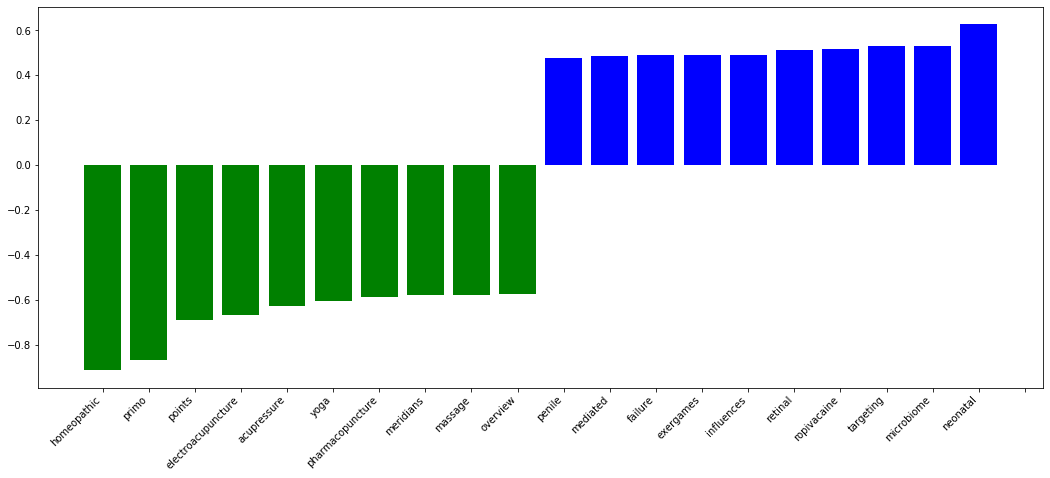

Predictions of 5 medical and 5 alternative medical titles, respectively are [1 1 0 1 1 0 0 0 0 0]
--- 0.5763862133026123 seconds ---


In [4]:
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
start_time = time.time()



titles_word = text.CountVectorizer(stop_words=stop_wordz)
titles_word.fit(titles_all['Titles'])
titles_words= titles_word.get_feature_names()
trainedsvm = svm.LinearSVC(dual=False, C = 0.2, max_iter=10000).fit(X, y)


def SVM_simple(X, y, train_size=0.7, val_size=0.15):
    total_data = X.shape[0]
    train_size = int(train_size * total_data)
    val_size = int(val_size * total_data)
    test_size = total_data - train_size - val_size

    train_test_X, val_X, train_test_y, val_y = train_test_split(X, y, test_size=val_size)
    train_X, test_X, train_y, test_y = train_test_split(train_test_X, train_test_y, test_size=test_size)
    
    trainedsvm = svm.LinearSVC(dual=False, C=0.2, max_iter=10000).fit(train_X, train_y)
    predictionsvm = trainedsvm.predict(test_X)
    print(confusion_matrix(test_y,predictionsvm))
    print(classification_report(test_y,predictionsvm))
    
def feature_plot(classifier, feature_names, top_features=10):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    plt.figure(figsize=(18, 7))
    colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1 + 2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
    plt.show()


SVM_simple(X, y, train_size=0.7, val_size=0.15)
feature_plot(trainedsvm, titles_words)

med = "Risk of pregnancy-related venous thromboembolism and obstetrical complications in women with inherited type I antithrombin deficiency: a retrospective, single-centre, cohort study"
med2 = "Safety and immunogenicity of a tetravalent dengue vaccine in children aged 2–17 years: a randomised, placebo-controlled, phase 2 trial"
med3 = "Adaptive Randomization of Veliparib–Carboplatin Treatment in Breast Cancer"
med4 = "PD-1 Blockade with Pembrolizumab in Advanced Merkel-Cell Carcinoma"
med5 = "Serious Asthma Events with Fluticasone plus Salmeterol versus Fluticasone Alone"
altm = "Prevalence, Patterns, and Predictors of T'ai Chi and Qigong Use in the United States: Results of a Nationally Representative Survey"
altm2 = 'Is Oral Chinese Herbal Medicine Beneficial for Psoriasis Vulgaris? A Meta-Analysis of Comparisons with Acitretin'
altm3 = "The American Coneflower: A Prophylactic Role Involving Nonspecific Immunity"
altm4 = "Effect of BEMER Magnetic Field Therapy on the Level of Fatigue in Patients with Multiple Sclerosis: A Randomized, Double-Blind Controlled Trial"
altm5 = "Improving Access to Integrative Oncology Through Group Medical Visits: A Pilot Implementation Project"


newtitles = titles_word.transform([med, med2, med3, med4, med5, altm, altm2, altm3, altm4, altm5])
trainedsvm.predict(newtitles)
print("Predictions of 5 medical and 5 alternative medical titles, respectively are {}".format(trainedsvm.predict(newtitles)))

print("--- %s seconds ---" % (time.time() - start_time))

# SVM Fit to Abstracts

[[160  15]
 [  5 159]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       175
           1       0.91      0.97      0.94       164

    accuracy                           0.94       339
   macro avg       0.94      0.94      0.94       339
weighted avg       0.94      0.94      0.94       339



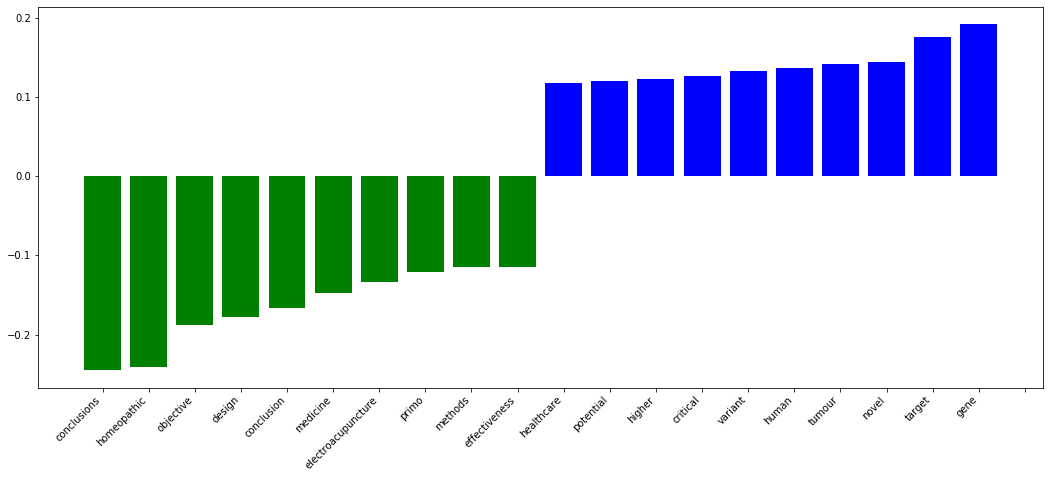

Predictions of 5 medical and 5 alternative medical abstracts, respectively are [1 1 1 1 1 0 0 0 0 0]
--- 2.2006850242614746 seconds ---


In [5]:
import time
start_time = time.time()

abstracts_word = text.CountVectorizer(stop_words=stop_wordz)
abstracts_word.fit(abstracts_all['Abstracts'])
abstracts_words= abstracts_word.get_feature_names()
trainedsvmab = svm.LinearSVC(dual=False, max_iter=100000, C=0.2).fit(X_abstracts, y_abstracts)




SVM_simple(X_abstracts, y_abstracts, train_size=0.7, val_size=0.20)
feature_plot(trainedsvmab, abstracts_words)


medab = "The National Institute of Mental Health (NIMH) ‘fast-fail’ approach seeks to improve too-often-misleading early-phase drug development methods by incorporating biomarker-based proof-of-mechanism (POM) testing in phase 2a. This first comprehensive application of the fast-fail approach evaluated the potential of κ-opioid receptor (KOR) antagonism for treating anhedonia with a POM study determining whether robust target engagement favorably impacts the brain circuitry hypothesized to mediate clinical effects. Here we report the results from a multicenter, 8-week, double-blind, placebo-controlled, randomized trial in patients with anhedonia and a mood or anxiety disorder (selective KOR antagonist (JNJ-67953964, 10 mg; n = 45) and placebo (n = 44)). JNJ-67953964 significantly increased functional magnetic resonance imaging (fMRI) ventral striatum activation during reward anticipation (primary outcome) as compared to placebo (baseline-adjusted mean: JNJ-67953964, 0.72 (s.d. = 0.67); placebo, 0.33 (s.d. = 0.68); F(1,86) = 5.58, P < 0.01; effect size = 0.58 (95% confidence interval, 0.13–0.99)). JNJ-67953964, generally well tolerated, was not associated with any serious adverse events. This study supports proceeding with assessment of the clinical impact of target engagement and serves as a model for implementing the ‘fast-fail’ approach."
medab2 = "Neoadjuvant checkpoint inhibition, in which the therapy is administered before surgery, is a promising new approach to managing bulky but resectable melanoma, and is also being explored in other cancers. This strategy has a high pathologic response rate, which correlates with survival outcomes. The fact that biopsies are routinely available provides a unique opportunity for understanding the responses to therapy and carrying out reverse translation in which these data are used to select therapies in the clinic or in trials that are more likely to improve patient outcomes. In this Perspective, we discuss the rationale for neoadjuvant immunotherapy in resectable solid tumors based on preclinical and human translational data, summarize the results of recent clinical trials and ongoing research, and focus on future directions for enhancing reverse translation."
medab3 = "Successful drug discovery is ultimately contingent on the availability of workable, relevant, predictive model systems. Conversely, for cardiac muscle, the lack of human preclinical models to inform target validation and compound development has likely contributed to the perennial problem of clinical trial failures, despite encouraging non-human results. By contrast, human cardiomyocytes produced from pluripotent stem cell models have recently been applied to safety pharmacology, phenotypic screening, target validation and high-throughput assays, facilitating cardiac drug discovery. Here, we review the impact of human pluripotent stem cell models in cardiac drug discovery, discussing the range of applications, readouts, and disease models employed, along with the challenges and prospects to advance this fruitful mode of research further."
medab4 = "Epithelial-to-mesenchymal transition (EMT) plays an important role in invasion and metastasis of hepatocellular carcinoma (HCC). Our previous study found that atypical protein kinase C-ι (aPKC-ι) promoted the EMT process in HCC. However, how the aPKC-ι signaling pathway is regulated in HCC has not been elucidated. In this study, vector transfection was utilized to study the invasion of HCC cells, and the mechanism between P300 and aPKC-ι signaling pathways in regulating the EMT process of HCC was further elucidated in vitro and in vivo. We found both P300 and aPKC-ι were highly expressed in HCC and they were correlated with tumor progression and poor survival in HCC patients. P300 knockdown inhibited EMT, invasion and other malignant events of HCC cells but promoted cell apoptosis and cycle arrest. However, the effects mediated by P300 knockdown were abolished by aPKC-ι overexpression. Further studies showed that P300 upregulates aPKC-ι expression through increasing the transcription of Elk1, a transcriptional activator of aPKC-ι, and stabilizing Elk1 protein and its phosphorylation. In conclusion, our work uncovered the molecular mechanism by which oncogenic aPKC-ι is upregulated in HCC and suggests that P300, like aPKC-ι, may be used as a prognostic biomarker and therapeutic target in patients with HCC."
medab5 = "An unmet clinical need remains for an effective tetravalent dengue vaccine suitable for all age groups, regardless of serostatus. We assessed the immunogenicity and safety of three different dose schedules of a tetravalent dengue vaccine (TAK-003) over a 48-month period in children living in dengue-endemic countries. We did a large, phase 2, double-blind, placebo-controlled trial at three sites in the Dominican Republic, Panama, and the Philippines. Healthy participants aged 2–17 years were randomly assigned 1:2:5:1 using an interactive web response system with stratification by age to receive either a two-dose primary series (days 1 and 91), one primary dose (day 1), one primary dose plus booster (days 1 and 365), or placebo. Participants and relevant study personnel were masked to the random assignment until completion of the study at month 48. To maintain masking, TAK-003 recipients were administered placebo doses when appropriate. The primary objective was assessment of neutralising geometric mean titres for each serotype to month 48 assessed in the per-protocol immunogenicity subset. Secondary safety endpoints included proportions of participants with serious adverse events and symptomatic virologically confirmed dengue. This study is registered with ClinicalTrials.gov, NCT02302066. Between Dec 5, 2014, and Feb 13, 2015, 1800 children were randomly assigned to the following groups: two-dose primary series (n=201), one primary dose (n=398), one primary dose plus 1-year booster (n=1002), and placebo (n=199). Of them, 1479 (82%) participants completed the 48-month study. Immunogenicity endpoints were assessed in 562 participants enrolled in the immunogenicity subset, of whom 509 were included in the per-protocol subset. At month 48, antibody titres remained elevated in all TAK-003 groups compared with placebo, irrespective of baseline serostatus. At month 48, geometric mean titres were 378 (95% CI 226–632) in two-dose, 421 (285–622) in one-dose, 719 (538–960) in one-dose plus 1-year booster, and 100 (50–201) in placebo recipients against DENV 1; 1052 (732–1511), 1319 (970–1794), 1200 (927–1553), and 208 (99–437) against DENV 2; 183 (113–298), 201 (135–298), 288 (211–392), and 71 (37–139) against DENV 3; and 152 (97–239), 164 (114–236), 219 (165–290), and 46 (26–82) against DENV 4; and tetravalent seropositivity rate was 89% (79–96), 86% (80–92), 97% (93–99), and 60% (47–72), respectively. Virologically confirmed dengue was recorded in 37 (2%) TAK-003 and 13 (7%) placebo participants, with a relative risk of 0·35 (0·19–0·65). No vaccine-related serious adverse events or severe dengue virus disease were reported. TAK-003 elicited antibody responses against all four serotypes, which persisted to 48 months post-vaccination, regardless of baseline serostatus. No important safety risks were identified. We observed a long-term reduction in risk of symptomatic dengue virus disease in vaccinees. Results from this study provide a long-term safety database and support assessment of the vaccine in the ongoing phase 3 efficacy study."
altmab = "In order to meet the growing needs of the European Union medicinal and aromatic plants, Hungary is still one of the major exporters today, although earlier, until the 1980s, we were considered a great herb-growing nation. Therefore, the development of the national medicinal and aromatic herb growing sector is an essential requirement for maintaining and developing our market position. The natural conditions of Hungary favor the cultivation of medicinal and aromatic plants. There are more than 330 herbs in our country. About seventy percent of the drugs grown and harvested are exported. However, significant changes are needed in domestic sales and further processing in order to become a leading industrial sector. Hungary also possesses modern separation techniques and large instruments for analysis, which allow the proper analytical examination of drugs and the precise determination of their active substances. Our universities and research institutes are also prepared to study the active ingredients of herbs by molecular biological methods, which may allow the exact mechanism of action of bioactive substances to be determined and the herbs to be reassessed. Our accession to the European Union the palette of products made from former herbs has significantly changed. From 2013, the category of medicinal product was discontinued and the preparations were classified as either food or medicine. However, there are significant costs associated with qualifying as a drug, so drugs or extracts are largely added to dietary supplements. As a result, the strange situation is that dietary supplements are prohibited from making any health claims, even though the dietary supplement is actually not for the benefit of a healthy population, but for those who have a health problem or do not have suitable foods, which are rich in bioactive substances. The justification of phytotherapy must be demonstrated, depending on the state of the art. In the context of safe therapy, studies must follow the requirements of medicines and only then can they become herbal medicines. There is still much to be desired in this area in our country. Classification as a drug is based on expensive animal tests and clinical studies. A new problem arises here, as herbal cure is currently part of the arsenal of complementary medicine. With few exceptions, clinical doctors do not use herbal therapies. Patients usually ask the advice of pharmacists, naturalists, and more rarely, dietitians. At the Arteriosclerosis Research Group, at the II. Department of Medicine and Institute of Pharmacognosy several decades of biomedical research have served and serve the purpose of evaluating and reassessing the effects of plants used in folk medicine. Over the years, we have been searching for drugs, extracts, and medicines of natural origin that are useful in liver and intestinal diseases known in folk medicine, and are believed to have lipid lowering, antioxidant and immune stimulating effects. In the article, animal and human studies will be also presented."
altmab2 = "This research was done to explore the role of fresh garlic homogenate (GH) on attenuation of myocardial damage when administered concurrently with atenolol (ATN) in experimental animals. At the end of treatment of male albino rats, hearts were excised from anesthetized animals and mounted on modified Langendorff setup. After initial perfusion with physiological solution, hearts were subjected to 15 min global no flow ischemia reperfusion injury (IRI) and perfused again. Significant recovery in developed tension and heart rate was exhibited by hearts of animals pretreated with ATN, GH-125 and GH-250. There was significant elevation of LDH and CK-MB in heart tissue homogenate and fall in perfusate of treated groups (ATN, GH-125 and GH-250). Additionally, simultaneous administration of GH-250 with ATN resulted in significant increase in endogenous antioxidant enzymes (SOD and catalase) activities. The augmented antioxidant activities could be due to the possible synergistic potential of ATN in GH mediated scavenging of oxidative free radicals produced during IRI. On the contrary, high dose of GH (500 mg/kg) failed to demonstrate similar potential even in presence of ATN. Hence, only moderate intake of garlic is good for cardioprotection when administered prophylactically and addition of ATN produces synergistic effect."
altmab3 = "NMR proton relaxation is sensitive to the dynamics of the water molecule H2O, through the interaction of the spin of the proton (1H) with external magnetic and electromagnetic fields. We measured dilution and potentization processes through measurements of 1H spin-lattice T1 and spin–spin T2 relaxation times. In order to interpret the recorded fluctuations in T1- or T2-values, experimental data were linearized by investigating how the area under a fluctuating time = f(dilution) curve (dilution integral or DI) changes with dilution. Two kinds of fitting procedures were considered: chi-square fitting with a goodness-of-fit probability, and least absolute deviations criterion with Pearson's linear correlation coefficient. We showed that fluctuations are not attributable to random noise and/or experimental errors, evidencing a memory effect quantifiable by the slope of the DI = f(dilution) straight line. For all experiments, correlation coefficients were found to lie above 0.9999, against 0.999 for random noise. The discrimination between experimental slopes and slopes associated with random noise data was very good at a five-sigma level of confidence (i.e. probability 3 × 10−7). Discrimination between experimental slopes at a five-sigma level was possible in most cases, with three exceptions: gelsemium aqua pura v gelsemium dilution (four-sigma); copper aqua pura v gelsemium aqua pura (four-sigma) and copper simple dilution v gelsemium simple dilution (three-sigma). All potentized samples show very good discrimination (at least nine-sigma level) against aqua pura, lactose or simple dilution. It was possible to transform the associated relaxation times into a molecular rotational correlation time τc and an average spin–spin distance d. Our experiments thus point to a considerable slowing down of molecular movements (τc > 1300 ps or T = 224–225 K) around water molecules up to a distance of 3.7 Å, values. It was also possible to rule out other possible mechanisms of relaxation (diffusive motion, 17O-1H relaxation or coupling with the electronic spin, S = 1, of dissolved dioxygen molecules). There is clear evidence that homeopathic solutions cannot be considered as pure water as commonly assumed. Instead, we have evidenced a clear memory effect upon dilution/potentization of a substance (water, lactose, copper, gelsemium) reflected by different rotational correlation times and average H⋯H distances. A possible explanation for such a memory effect may lie in the formation of mesoscopic water structures around nanoparticles and/or nanobubbles mediated by zero-point fluctuations of the vacuum electromagnetic field as suggested by quantum field theories. The existence of an Avogadro's ‘wall’ for homeopathically-prepared medicines is not supported by our data. Rather it appears that all dilutions have a specific material configuration determined by the potentized substance, also by the chemical nature of the containers, and dissolved gases and the electromagnetic environment. This sensitivity of homeopathically-prepared medicines to electromagnetic fields may be amplified by the highly non-linear processing routinely applied in the preparation of homeopathic medicines. Future work is needed in such directions. The time is now ripe for a demystification of the preparation of homeopathic remedies."
altmab4 = "This article describes the implementation of a group medical visit (GMV) model to increase access to integrative oncology (IO) care. The most challenging and critical time to access high-quality IO care is while patients are receiving conventional cancer therapy. Often demand for individual IO clinic consultations precludes this from occurring. A three-session GMV program was designed to alleviate barriers to receiving integrative care during active cancer treatment. Design: A consolidated framework was used for implementation research and focused ethnography methods to describe the IO GMV implementation process. Data sources included patient evaluations, participant observation, and brief provider and patient interviews. Setting: A pilot program was created to assess the feasibility and acceptability of implementing IO GMVs at a comprehensive cancer center. Intervention: Each three-session GMV consisted of a didactic session, followed by individual visits with the integrative oncologist. Results: The setting, intervention, and implementation process of the IO GMV program were described. Thirty-two patients participated in the first five cohorts of the program. Twenty-two were women; 24 were White. The median age of participants was 52. Patient evaluations demonstrate high levels of satisfaction with the program with all scored aspects rated >4.0 on a five-point Likert scale. For the medical center, group visits are a financially viable alternative to individual IO visits; revenue from group visits exceeded the revenue potential of 6 h of individual visits by an average of 38%. Conclusion: GMVs are a feasible and promising model for increasing access to IO. Patients in active cancer treatment were able to participate in the program. Future research and implementation efforts could examine health outcomes over time after participation in GMVs, as well as the feasibility of using this model with more diverse patient populations." 
altmab5 = "As rates of opiate misuse rise in the United States, so do significant associated health and financial consequences to afflicted individuals, their families, and society at large. Methadone maintenance therapy (MMT) is one evidence-based approach to treating opiate addiction, yet supplemental psychosocial treatment to support this approach is lacking. Mindfulness-based relapse prevention (MBRP) has shown to be efficacious in various substance use populations, but has yet to be assessed with MMT clients. Design: The current mixed methods study was designed to inform protocol adaptation for MMT clients and to evaluate the feasibility, acceptability, and preliminary efficacy of MBRP for this population. Subjects: The sample consisted of adults (N = 15) recruited from a methadone clinic to participate in a 6-week MBRP course. Outcome measures: Data from focus groups and course satisfaction surveys supported feasibility and acceptability of the intervention. Self-report outcome measures included depression, anxiety, craving, symptoms of post-traumatic stress, and experiential avoidance, and were assessed at baseline and postcourse. Results: Mean scores on all primary outcomes changed in the expected direction at postcourse, and baseline to postcourse changes in depression, craving, and trauma symptoms reached statistical significance. Conclusions: Results from this initial pilot trial support feasibility and acceptability, and provide preliminary data on outcomes for future trials of mindfulness-based approaches within the MMT community."

abs_words = word_bagger.transform([medab, medab2, medab3, medab4, medab5, altmab, altmab2, altmab3, altmab4, altmab5])

print("Predictions of 5 medical and 5 alternative medical abstracts, respectively are {}".format(trainedsvmab.predict(abs_words)))
print("--- %s seconds ---" % (time.time() - start_time))

# Fitting Data to Artificial Neural Networks (ANN)



# ANN Fit to Titles

Training...
Train on 2124 samples, validate on 236 samples
Epoch 1/35
 - 2s - loss: 0.4832 - accuracy: 0.8187 - val_loss: 0.6615 - val_accuracy: 0.6780
Epoch 2/35
 - 1s - loss: 0.3403 - accuracy: 0.9845 - val_loss: 0.6720 - val_accuracy: 0.4703
Epoch 3/35
 - 1s - loss: 0.3093 - accuracy: 0.9986 - val_loss: 0.6849 - val_accuracy: 0.4661
Epoch 4/35
 - 1s - loss: 0.2994 - accuracy: 1.0000 - val_loss: 0.6810 - val_accuracy: 0.4703
Epoch 5/35
 - 2s - loss: 0.2889 - accuracy: 0.9995 - val_loss: 0.6828 - val_accuracy: 0.4703
Epoch 6/35
 - 2s - loss: 0.2779 - accuracy: 1.0000 - val_loss: 0.6739 - val_accuracy: 0.4788
Epoch 7/35
 - 1s - loss: 0.2698 - accuracy: 1.0000 - val_loss: 0.6620 - val_accuracy: 0.5000
Epoch 8/35
 - 1s - loss: 0.2610 - accuracy: 1.0000 - val_loss: 0.6391 - val_accuracy: 0.5466
Epoch 9/35
 - 1s - loss: 0.2507 - accuracy: 1.0000 - val_loss: 0.6203 - val_accuracy: 0.5847
Epoch 10/35
 - 1s - loss: 0.2452 - accuracy: 0.9995 - val_loss: 0.5694 - val_accuracy: 0.6610
Epoch 11/3

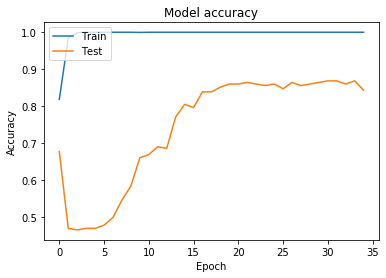

[[426  34]
 [131 421]]
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       460
           1       0.93      0.76      0.84       552

    accuracy                           0.84      1012
   macro avg       0.85      0.84      0.84      1012
weighted avg       0.85      0.84      0.84      1012

Predictions of 5 medical and 5 alternative medical titles, respectively are [1 1 0 1 0 0 0 0 0 0]
--- 53.76300501823425 seconds ---


In [28]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.utils.np_utils import to_categorical
from sklearn.metrics import classification_report,confusion_matrix
from keras import optimizers

import time
start_time = time.time()


def neuralnets(): 
    
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.30, random_state = 101)
    
    Y_Train = to_categorical(Y_Train)

    
    #Y_Test = to_categorical(Y_Test)
    


    input_dim = X_Train.shape[1]
    nb_classes = Y_Train.shape[1]

    
    model = Sequential()
    model.add(Dense(512, input_dim=input_dim))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.15))
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.15))
    #model.add(Dense(256))
    #model.add(BatchNormalization())
    #model.add(Activation('relu'))
    #model.add(Dropout(0.15))
    model.add(Dense(nb_classes))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))

  
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


    print("Training...")

    
    history = model.fit(X_Train, Y_Train, validation_split=0.1, epochs=35, batch_size=100, verbose=2)

    preds = model.predict_classes(X_Test, verbose=0)
  
    # plot metrics
    import matplotlib.pyplot as plt
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
    print(confusion_matrix(Y_Test,preds))
    print(classification_report(Y_Test,preds))
    
    med = "Risk of pregnancy-related venous thromboembolism and obstetrical complications in women with inherited type I antithrombin deficiency: a retrospective, single-centre, cohort study"
    med2 = "Safety and immunogenicity of a tetravalent dengue vaccine in children aged 2–17 years: a randomised, placebo-controlled, phase 2 trial"
    med3 = "Adaptive Randomization of Veliparib–Carboplatin Treatment in Breast Cancer"
    med4 = "PD-1 Blockade with Pembrolizumab in Advanced Merkel-Cell Carcinoma"
    med5 = "Serious Asthma Events with Fluticasone plus Salmeterol versus Fluticasone Alone"
    altm = "Prevalence, Patterns, and Predictors of T'ai Chi and Qigong Use in the United States: Results of a Nationally Representative Survey"
    altm2 = 'Is Oral Chinese Herbal Medicine Beneficial for Psoriasis Vulgaris? A Meta-Analysis of Comparisons with Acitretin'
    altm3 = "The American Coneflower: A Prophylactic Role Involving Nonspecific Immunity"
    altm4 = "Effect of BEMER Magnetic Field Therapy on the Level of Fatigue in Patients with Multiple Sclerosis: A Randomized, Double-Blind Controlled Trial"
    altm5 = "Improving Access to Integrative Oncology Through Group Medical Visits: A Pilot Implementation Project"


    newtitles = titles_word.transform([med, med2, med3, med4, med5, altm, altm2, altm3, altm4, altm5])
    
    print("Predictions of 5 medical and 5 alternative medical titles, respectively are {}".format(np.argmax(model.predict(newtitles), axis=1)))


neuralnets()
print("--- %s seconds ---" % (time.time() - start_time))

# ANN Fit to Abstracts

Training...
Train on 2127 samples, validate on 237 samples
Epoch 1/30
 - 2s - loss: 0.6740 - accuracy: 0.5802 - val_loss: 0.6803 - val_accuracy: 0.5443
Epoch 2/30
 - 1s - loss: 0.5946 - accuracy: 0.7005 - val_loss: 0.6581 - val_accuracy: 0.6667
Epoch 3/30
 - 1s - loss: 0.5509 - accuracy: 0.7819 - val_loss: 0.6239 - val_accuracy: 0.8017
Epoch 4/30
 - 1s - loss: 0.5118 - accuracy: 0.8246 - val_loss: 0.5815 - val_accuracy: 0.8734
Epoch 5/30
 - 1s - loss: 0.4915 - accuracy: 0.8514 - val_loss: 0.5341 - val_accuracy: 0.8903
Epoch 6/30
 - 1s - loss: 0.4622 - accuracy: 0.8843 - val_loss: 0.5032 - val_accuracy: 0.8903
Epoch 7/30
 - 1s - loss: 0.4375 - accuracy: 0.9130 - val_loss: 0.4789 - val_accuracy: 0.9072
Epoch 8/30
 - 1s - loss: 0.4247 - accuracy: 0.9267 - val_loss: 0.4557 - val_accuracy: 0.9072
Epoch 9/30
 - 1s - loss: 0.4065 - accuracy: 0.9389 - val_loss: 0.4441 - val_accuracy: 0.9114
Epoch 10/30
 - 1s - loss: 0.3894 - accuracy: 0.9539 - val_loss: 0.4279 - val_accuracy: 0.9198
Epoch 11/3

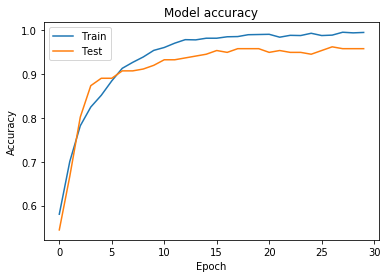

[[452  16]
 [ 29 517]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       468
           1       0.97      0.95      0.96       546

    accuracy                           0.96      1014
   macro avg       0.95      0.96      0.96      1014
weighted avg       0.96      0.96      0.96      1014

Predictions of 5 medical and 5 alternative medical abstracts, respectively are [1 1 1 1 1 0 0 0 0 0]
--- 27.63914704322815 seconds ---


In [67]:
# ATTEMPT WITH DECAYING LEARNING RATE
import time
start_time = time.time()


def neuralnets_abs(): 
    
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_abstracts, y_abstracts, test_size = 0.30, random_state = 101)
    
    Y_Train = to_categorical(Y_Train)

    
    #Y_Test = to_categorical(Y_Test)
    


    input_dim = X_Train.shape[1]
    nb_classes = Y_Train.shape[1]


    model = Sequential()
    model.add(Dense(30, input_dim=input_dim))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.15))
    model.add(Dense(15))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.15))
    model.add(Dense(20))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.15))
    model.add(Dense(nb_classes))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    

    RMSprop =optimizers.RMSprop(learning_rate=0.0001, rho=0.9)
    model.compile(loss='categorical_crossentropy', optimizer= RMSprop, metrics=['accuracy'])




    print("Training...")

    #history = model.fit(X_Train, Y_Train, nb_epoch=15, batch_size=5, validation_split=0.1, verbose=2)
    history = model.fit(X_Train, Y_Train, validation_split=0.1, epochs=30, batch_size=30, verbose=2)

    predsabs = model.predict_classes(X_Test, verbose=0)
    # history = model.fit(X_Train, Y_Train,validation_data = (X_Test,Y_Test), epochs=15, batch_size=5)

    # plot metrics
    import matplotlib.pyplot as plt
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
    print(confusion_matrix(Y_Test,predsabs))
    print(classification_report(Y_Test,predsabs))
    
    medab = "The National Institute of Mental Health (NIMH) ‘fast-fail’ approach seeks to improve too-often-misleading early-phase drug development methods by incorporating biomarker-based proof-of-mechanism (POM) testing in phase 2a. This first comprehensive application of the fast-fail approach evaluated the potential of κ-opioid receptor (KOR) antagonism for treating anhedonia with a POM study determining whether robust target engagement favorably impacts the brain circuitry hypothesized to mediate clinical effects. Here we report the results from a multicenter, 8-week, double-blind, placebo-controlled, randomized trial in patients with anhedonia and a mood or anxiety disorder (selective KOR antagonist (JNJ-67953964, 10 mg; n = 45) and placebo (n = 44)). JNJ-67953964 significantly increased functional magnetic resonance imaging (fMRI) ventral striatum activation during reward anticipation (primary outcome) as compared to placebo (baseline-adjusted mean: JNJ-67953964, 0.72 (s.d. = 0.67); placebo, 0.33 (s.d. = 0.68); F(1,86) = 5.58, P < 0.01; effect size = 0.58 (95% confidence interval, 0.13–0.99)). JNJ-67953964, generally well tolerated, was not associated with any serious adverse events. This study supports proceeding with assessment of the clinical impact of target engagement and serves as a model for implementing the ‘fast-fail’ approach."
    medab2 = "Neoadjuvant checkpoint inhibition, in which the therapy is administered before surgery, is a promising new approach to managing bulky but resectable melanoma, and is also being explored in other cancers. This strategy has a high pathologic response rate, which correlates with survival outcomes. The fact that biopsies are routinely available provides a unique opportunity for understanding the responses to therapy and carrying out reverse translation in which these data are used to select therapies in the clinic or in trials that are more likely to improve patient outcomes. In this Perspective, we discuss the rationale for neoadjuvant immunotherapy in resectable solid tumors based on preclinical and human translational data, summarize the results of recent clinical trials and ongoing research, and focus on future directions for enhancing reverse translation."
    medab3 = "Successful drug discovery is ultimately contingent on the availability of workable, relevant, predictive model systems. Conversely, for cardiac muscle, the lack of human preclinical models to inform target validation and compound development has likely contributed to the perennial problem of clinical trial failures, despite encouraging non-human results. By contrast, human cardiomyocytes produced from pluripotent stem cell models have recently been applied to safety pharmacology, phenotypic screening, target validation and high-throughput assays, facilitating cardiac drug discovery. Here, we review the impact of human pluripotent stem cell models in cardiac drug discovery, discussing the range of applications, readouts, and disease models employed, along with the challenges and prospects to advance this fruitful mode of research further."
    medab4 = "Epithelial-to-mesenchymal transition (EMT) plays an important role in invasion and metastasis of hepatocellular carcinoma (HCC). Our previous study found that atypical protein kinase C-ι (aPKC-ι) promoted the EMT process in HCC. However, how the aPKC-ι signaling pathway is regulated in HCC has not been elucidated. In this study, vector transfection was utilized to study the invasion of HCC cells, and the mechanism between P300 and aPKC-ι signaling pathways in regulating the EMT process of HCC was further elucidated in vitro and in vivo. We found both P300 and aPKC-ι were highly expressed in HCC and they were correlated with tumor progression and poor survival in HCC patients. P300 knockdown inhibited EMT, invasion and other malignant events of HCC cells but promoted cell apoptosis and cycle arrest. However, the effects mediated by P300 knockdown were abolished by aPKC-ι overexpression. Further studies showed that P300 upregulates aPKC-ι expression through increasing the transcription of Elk1, a transcriptional activator of aPKC-ι, and stabilizing Elk1 protein and its phosphorylation. In conclusion, our work uncovered the molecular mechanism by which oncogenic aPKC-ι is upregulated in HCC and suggests that P300, like aPKC-ι, may be used as a prognostic biomarker and therapeutic target in patients with HCC."
    medab5 = "An unmet clinical need remains for an effective tetravalent dengue vaccine suitable for all age groups, regardless of serostatus. We assessed the immunogenicity and safety of three different dose schedules of a tetravalent dengue vaccine (TAK-003) over a 48-month period in children living in dengue-endemic countries. We did a large, phase 2, double-blind, placebo-controlled trial at three sites in the Dominican Republic, Panama, and the Philippines. Healthy participants aged 2–17 years were randomly assigned 1:2:5:1 using an interactive web response system with stratification by age to receive either a two-dose primary series (days 1 and 91), one primary dose (day 1), one primary dose plus booster (days 1 and 365), or placebo. Participants and relevant study personnel were masked to the random assignment until completion of the study at month 48. To maintain masking, TAK-003 recipients were administered placebo doses when appropriate. The primary objective was assessment of neutralising geometric mean titres for each serotype to month 48 assessed in the per-protocol immunogenicity subset. Secondary safety endpoints included proportions of participants with serious adverse events and symptomatic virologically confirmed dengue. This study is registered with ClinicalTrials.gov, NCT02302066. Between Dec 5, 2014, and Feb 13, 2015, 1800 children were randomly assigned to the following groups: two-dose primary series (n=201), one primary dose (n=398), one primary dose plus 1-year booster (n=1002), and placebo (n=199). Of them, 1479 (82%) participants completed the 48-month study. Immunogenicity endpoints were assessed in 562 participants enrolled in the immunogenicity subset, of whom 509 were included in the per-protocol subset. At month 48, antibody titres remained elevated in all TAK-003 groups compared with placebo, irrespective of baseline serostatus. At month 48, geometric mean titres were 378 (95% CI 226–632) in two-dose, 421 (285–622) in one-dose, 719 (538–960) in one-dose plus 1-year booster, and 100 (50–201) in placebo recipients against DENV 1; 1052 (732–1511), 1319 (970–1794), 1200 (927–1553), and 208 (99–437) against DENV 2; 183 (113–298), 201 (135–298), 288 (211–392), and 71 (37–139) against DENV 3; and 152 (97–239), 164 (114–236), 219 (165–290), and 46 (26–82) against DENV 4; and tetravalent seropositivity rate was 89% (79–96), 86% (80–92), 97% (93–99), and 60% (47–72), respectively. Virologically confirmed dengue was recorded in 37 (2%) TAK-003 and 13 (7%) placebo participants, with a relative risk of 0·35 (0·19–0·65). No vaccine-related serious adverse events or severe dengue virus disease were reported. TAK-003 elicited antibody responses against all four serotypes, which persisted to 48 months post-vaccination, regardless of baseline serostatus. No important safety risks were identified. We observed a long-term reduction in risk of symptomatic dengue virus disease in vaccinees. Results from this study provide a long-term safety database and support assessment of the vaccine in the ongoing phase 3 efficacy study."
    altmab = "In order to meet the growing needs of the European Union medicinal and aromatic plants, Hungary is still one of the major exporters today, although earlier, until the 1980s, we were considered a great herb-growing nation. Therefore, the development of the national medicinal and aromatic herb growing sector is an essential requirement for maintaining and developing our market position. The natural conditions of Hungary favor the cultivation of medicinal and aromatic plants. There are more than 330 herbs in our country. About seventy percent of the drugs grown and harvested are exported. However, significant changes are needed in domestic sales and further processing in order to become a leading industrial sector. Hungary also possesses modern separation techniques and large instruments for analysis, which allow the proper analytical examination of drugs and the precise determination of their active substances. Our universities and research institutes are also prepared to study the active ingredients of herbs by molecular biological methods, which may allow the exact mechanism of action of bioactive substances to be determined and the herbs to be reassessed. Our accession to the European Union the palette of products made from former herbs has significantly changed. From 2013, the category of medicinal product was discontinued and the preparations were classified as either food or medicine. However, there are significant costs associated with qualifying as a drug, so drugs or extracts are largely added to dietary supplements. As a result, the strange situation is that dietary supplements are prohibited from making any health claims, even though the dietary supplement is actually not for the benefit of a healthy population, but for those who have a health problem or do not have suitable foods, which are rich in bioactive substances. The justification of phytotherapy must be demonstrated, depending on the state of the art. In the context of safe therapy, studies must follow the requirements of medicines and only then can they become herbal medicines. There is still much to be desired in this area in our country. Classification as a drug is based on expensive animal tests and clinical studies. A new problem arises here, as herbal cure is currently part of the arsenal of complementary medicine. With few exceptions, clinical doctors do not use herbal therapies. Patients usually ask the advice of pharmacists, naturalists, and more rarely, dietitians. At the Arteriosclerosis Research Group, at the II. Department of Medicine and Institute of Pharmacognosy several decades of biomedical research have served and serve the purpose of evaluating and reassessing the effects of plants used in folk medicine. Over the years, we have been searching for drugs, extracts, and medicines of natural origin that are useful in liver and intestinal diseases known in folk medicine, and are believed to have lipid lowering, antioxidant and immune stimulating effects. In the article, animal and human studies will be also presented."
    altmab2 = "This research was done to explore the role of fresh garlic homogenate (GH) on attenuation of myocardial damage when administered concurrently with atenolol (ATN) in experimental animals. At the end of treatment of male albino rats, hearts were excised from anesthetized animals and mounted on modified Langendorff setup. After initial perfusion with physiological solution, hearts were subjected to 15 min global no flow ischemia reperfusion injury (IRI) and perfused again. Significant recovery in developed tension and heart rate was exhibited by hearts of animals pretreated with ATN, GH-125 and GH-250. There was significant elevation of LDH and CK-MB in heart tissue homogenate and fall in perfusate of treated groups (ATN, GH-125 and GH-250). Additionally, simultaneous administration of GH-250 with ATN resulted in significant increase in endogenous antioxidant enzymes (SOD and catalase) activities. The augmented antioxidant activities could be due to the possible synergistic potential of ATN in GH mediated scavenging of oxidative free radicals produced during IRI. On the contrary, high dose of GH (500 mg/kg) failed to demonstrate similar potential even in presence of ATN. Hence, only moderate intake of garlic is good for cardioprotection when administered prophylactically and addition of ATN produces synergistic effect."
    altmab3 = "NMR proton relaxation is sensitive to the dynamics of the water molecule H2O, through the interaction of the spin of the proton (1H) with external magnetic and electromagnetic fields. We measured dilution and potentization processes through measurements of 1H spin-lattice T1 and spin–spin T2 relaxation times. In order to interpret the recorded fluctuations in T1- or T2-values, experimental data were linearized by investigating how the area under a fluctuating time = f(dilution) curve (dilution integral or DI) changes with dilution. Two kinds of fitting procedures were considered: chi-square fitting with a goodness-of-fit probability, and least absolute deviations criterion with Pearson's linear correlation coefficient. We showed that fluctuations are not attributable to random noise and/or experimental errors, evidencing a memory effect quantifiable by the slope of the DI = f(dilution) straight line. For all experiments, correlation coefficients were found to lie above 0.9999, against 0.999 for random noise. The discrimination between experimental slopes and slopes associated with random noise data was very good at a five-sigma level of confidence (i.e. probability 3 × 10−7). Discrimination between experimental slopes at a five-sigma level was possible in most cases, with three exceptions: gelsemium aqua pura v gelsemium dilution (four-sigma); copper aqua pura v gelsemium aqua pura (four-sigma) and copper simple dilution v gelsemium simple dilution (three-sigma). All potentized samples show very good discrimination (at least nine-sigma level) against aqua pura, lactose or simple dilution. It was possible to transform the associated relaxation times into a molecular rotational correlation time τc and an average spin–spin distance d. Our experiments thus point to a considerable slowing down of molecular movements (τc > 1300 ps or T = 224–225 K) around water molecules up to a distance of 3.7 Å, values. It was also possible to rule out other possible mechanisms of relaxation (diffusive motion, 17O-1H relaxation or coupling with the electronic spin, S = 1, of dissolved dioxygen molecules). There is clear evidence that homeopathic solutions cannot be considered as pure water as commonly assumed. Instead, we have evidenced a clear memory effect upon dilution/potentization of a substance (water, lactose, copper, gelsemium) reflected by different rotational correlation times and average H⋯H distances. A possible explanation for such a memory effect may lie in the formation of mesoscopic water structures around nanoparticles and/or nanobubbles mediated by zero-point fluctuations of the vacuum electromagnetic field as suggested by quantum field theories. The existence of an Avogadro's ‘wall’ for homeopathically-prepared medicines is not supported by our data. Rather it appears that all dilutions have a specific material configuration determined by the potentized substance, also by the chemical nature of the containers, and dissolved gases and the electromagnetic environment. This sensitivity of homeopathically-prepared medicines to electromagnetic fields may be amplified by the highly non-linear processing routinely applied in the preparation of homeopathic medicines. Future work is needed in such directions. The time is now ripe for a demystification of the preparation of homeopathic remedies."
    altmab4 = "This article describes the implementation of a group medical visit (GMV) model to increase access to integrative oncology (IO) care. The most challenging and critical time to access high-quality IO care is while patients are receiving conventional cancer therapy. Often demand for individual IO clinic consultations precludes this from occurring. A three-session GMV program was designed to alleviate barriers to receiving integrative care during active cancer treatment. Design: A consolidated framework was used for implementation research and focused ethnography methods to describe the IO GMV implementation process. Data sources included patient evaluations, participant observation, and brief provider and patient interviews. Setting: A pilot program was created to assess the feasibility and acceptability of implementing IO GMVs at a comprehensive cancer center. Intervention: Each three-session GMV consisted of a didactic session, followed by individual visits with the integrative oncologist. Results: The setting, intervention, and implementation process of the IO GMV program were described. Thirty-two patients participated in the first five cohorts of the program. Twenty-two were women; 24 were White. The median age of participants was 52. Patient evaluations demonstrate high levels of satisfaction with the program with all scored aspects rated >4.0 on a five-point Likert scale. For the medical center, group visits are a financially viable alternative to individual IO visits; revenue from group visits exceeded the revenue potential of 6 h of individual visits by an average of 38%. Conclusion: GMVs are a feasible and promising model for increasing access to IO. Patients in active cancer treatment were able to participate in the program. Future research and implementation efforts could examine health outcomes over time after participation in GMVs, as well as the feasibility of using this model with more diverse patient populations." 
    altmab5 = "As rates of opiate misuse rise in the United States, so do significant associated health and financial consequences to afflicted individuals, their families, and society at large. Methadone maintenance therapy (MMT) is one evidence-based approach to treating opiate addiction, yet supplemental psychosocial treatment to support this approach is lacking. Mindfulness-based relapse prevention (MBRP) has shown to be efficacious in various substance use populations, but has yet to be assessed with MMT clients. Design: The current mixed methods study was designed to inform protocol adaptation for MMT clients and to evaluate the feasibility, acceptability, and preliminary efficacy of MBRP for this population. Subjects: The sample consisted of adults (N = 15) recruited from a methadone clinic to participate in a 6-week MBRP course. Outcome measures: Data from focus groups and course satisfaction surveys supported feasibility and acceptability of the intervention. Self-report outcome measures included depression, anxiety, craving, symptoms of post-traumatic stress, and experiential avoidance, and were assessed at baseline and postcourse. Results: Mean scores on all primary outcomes changed in the expected direction at postcourse, and baseline to postcourse changes in depression, craving, and trauma symptoms reached statistical significance. Conclusions: Results from this initial pilot trial support feasibility and acceptability, and provide preliminary data on outcomes for future trials of mindfulness-based approaches within the MMT community."

    new_abs = word_bagger.transform([medab, medab2, medab3, medab4, medab5, altmab, altmab2, altmab3, altmab4, altmab5])
    
    print("Predictions of 5 medical and 5 alternative medical abstracts, respectively are {}".format(np.argmax(model.predict(new_abs), axis=1)))


    
neuralnets_abs()

print("--- %s seconds ---" % (time.time() - start_time))

In [7]:
scores = {'Titles Accuracy':{"Naive-Bayes":90, 'Decision Tree': 82.8, 'Random Forests': 85, "Adaboost": 80, 'SVM': 88, 'ANN':84},
'Titles Time':{"Naive-Bayes":0.184, 'Decision Tree': 92.96, 'Random Forests': 87.724, "Adaboost": 241.16, 'SVM': 0.43, 'ANN':53.76},
'Titles Predictions':{"Naive-Bayes":8/10, 'Decision Tree': 8/10, 'Random Forests': 9/10, "Adaboost": 9/10, 'SVM': 8/10, 'ANN':9/10},         
'Titles Accuracy/Time':{"Naive-Bayes":90/0.184, 'Decision Tree': 82.8/92.96, 'Random Forests': 85/87.24, "Adaboost": 80/241.16, 'SVM': 88/0.43, 'ANN':84/53./76},
'Abstracts Accuracy':{"Naive-Bayes":94, 'Decision Tree': 89, 'Random Forests': 94, "Adaboost": 95, 'SVM': 95, 'ANN':96},
'Abstracts Time':{"Naive-Bayes":1.35, 'Decision Tree': 199, 'Random Forests': 162.4, "Adaboost": 1154, 'SVM': 2.88, 'ANN':27.64},
'Abstracts Predictions':{"Naive-Bayes":9/10, 'Decision Tree': 8/10, 'Random Forests': 10/10, "Adaboost": 9/10, 'SVM': 10/10, 'ANN':10/10},
'Abstracts Accuracy/Time':{"Naive-Bayes":94/1.35, 'Decision Tree': 89/199, 'Random Forests': 94/162.4, "Adaboost": 95/1154, 'SVM': 95/2.88, 'ANN':96/27.64}}

In [8]:
summary =pd.DataFrame.from_dict(scores)
summary

,Titles Accuracy,Titles Time,Titles Predictions,Titles Accuracy/Time,Abstracts Accuracy,Abstracts Time,Abstracts Predictions,Abstracts Accuracy/Time
Naive-Bayes,90.0,0.184,0.8,489.130435,94,1.35,0.9,69.629630
Decision Tree,82.8,92.960,0.8,0.890706,89,199.00,0.8,0.447236
Random Forests,85.0,87.724,0.9,0.974324,94,162.40,1.0,0.578818
Adaboost,80.0,241.160,0.9,0.331730,95,1154.00,0.9,0.082322
SVM,88.0,0.430,0.8,204.651163,95,2.88,1.0,32.986111
ANN,84.0,53.760,0.9,0.020854,96,27.64,1.0,3.473227


In [16]:
summary.to_csv('summary_')